# S&P symbols

In [20]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [21]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
# convert symbol column to list
tickers = df['Symbol'].values.tolist()
def get_company_name(s):
    infos = df.loc[df['Symbol'] == s] 
    return infos.iloc[0]["Security"]


In [22]:
# list comprehension to replace data in strings

ma_count = 21
ma_count1 = 105

data = pdr.get_data_yahoo(tickers, start=dt.datetime(2019,1,1), end=dt.date.today())['Close']
data.tail()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


A    AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                            
2022-07-06  121.180000  13.89  181.770004  142.919998  152.529999  139.839996   
2022-07-07  123.150002  14.10  183.990005  146.350006  152.000000  140.789993   
2022-07-08  122.510002  13.97  182.899994  147.039993  152.850006  142.550003   
2022-07-11  123.120003  13.43  181.750000  144.869995  153.229996  141.320007   
2022-07-12  119.239998  14.77  183.839996  145.860001  152.460007  141.380005   

                  ABMD         ABT         ACN        ADBE  ...       WYNN  \
Date                                                        ...              
2022-07-06  253.330002  108.690002  275.940002  382.829987  ...  55.840000   
2022-07-07  267.320007  109.489998  279.399994  390.890015  ...  57.860001   
2022-07-08  267.000000  109.260002  279.070007  389.440002  ...  56.459999   
2022-07-11  262.070007  108.889999  274.869995  384.160004  ...  52.810001   
2022-07-12  256.260010  108.300003  273.670013  375.540009  ...  54.730000   

                  XEL        XOM       XRAY        XYL         YUM  \
Date                                                                 
2022-07-06  71.010002  83.279999  35.619999  79.510002  116.830002   
2022-07-07  69.580002  85.940002  35.459999  80.330002  117.739998   
2022-07-08  69.599998  86.080002  35.209999  78.760002  117.279999   
2022-07-11  69.889999  85.639999  34.759998  78.190002  116.540001   
2022-07-12  69.500000  84.500000  34.820000  76.779999  115.830002   

                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2022-07-06  105.730003  294.529999  50.410000  178.500000  
2022-07-07  106.059998  305.140015  51.480000  179.100006  
2022-07-08  105.339996  299.519989  51.040001  177.979996  
2022-07-11  103.300003  291.700012  50.410000  177.039993  
2022-07-12  103.029999  292.410004  50.200001  173.809998  

[5 rows x 503 columns]

In [23]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)

ma_week = data.rolling(window=ma_count1).mean()
ma_week_pers = data.div(ma_week).mul(100).sub(100)

df_prep = []
tickers = ma_pers.columns.values.tolist()
for ticker in tickers:
    ma_last = None
    counter = 0
    ma_d = 0
    ma_w = 0
    ma_last = 0
    date = None
    for index, row in ma_pers.iterrows():
        ma_d = ma_pers[ticker][index]
        ma_w = ma_week_pers[ticker][index]
        if ma_d < ma_w:
            date = index
            counter += 1
            ma_last= ma_d - ma_w
        else:
            ma_last = 0
            counter=0
    df_prep.append([ticker, counter, ma_last, ma_count, ma_count1, ma_d, ma_w, date, "cross"]) 
df = DataFrame(df_prep, columns=['name', 'count', 'ma_diff', 'ma_size', 'ma_size1', 'ma_daily', 'ma_weekly', 'last_date', 'ma_type'])\
    .sort_values(by=['count', 'ma_diff'], ascending=False)

lead_comps_df = df[df['count'] >= 2].drop_duplicates(subset=['name'])
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

name  count   ma_diff  ma_size  ma_size1  ma_daily  ma_weekly  last_date  \
292   MCK    247 -3.301341       21       105  2.920251   6.221592 2022-07-12   
309   MPC    199 -1.256247       21       105 -6.773569  -5.517321 2022-07-12   
495   XOM    187 -2.550157       21       105 -5.023149  -2.472992 2022-07-12   
488   WRB    183 -2.059042       21       105 -2.221496  -0.162454 2022-07-12   
138  DLTR    179 -2.240042       21       105  3.720012   5.960054 2022-07-12   
472  VRTX    148 -6.486723       21       105  4.984255  11.470978 2022-07-12   
366   PGR    145 -2.823750       21       105  1.675673   4.499423 2022-07-12   
110   CPB    137 -3.037404       21       105  3.052353   6.089757 2022-07-12   
332   NOC    137 -3.506547       21       105  0.665860   4.172407 2022-07-12   
94     CI    136 -4.618314       21       105  6.715628  11.333941 2022-07-12   
252   JNJ    133 -0.203191       21       105  0.015440   0.218632 2022-07-12   
31   AMGN    133 -0.804554       21       105  1.978069   2.782623 2022-07-12   
467   VLO    132 -5.137061       21       105 -7.721898  -2.584837 2022-07-12   
354   OXY    130 -2.851292       21       105 -3.004615  -0.153323 2022-07-12   
67    BMY    128 -2.850497       21       105 -1.221551   1.628947 2022-07-12   
381   PSX    126 -0.367944       21       105 -9.591566  -9.223622 2022-07-12   
430   TAP    125 -1.797271       21       105  6.458710   8.255981 2022-07-12   
441  TMUS     97 -2.924834       21       105  1.287606   4.212440 2022-07-12   
218   HII     88 -2.358233       21       105  0.112336   2.470569 2022-07-12   
274   LLY     81 -8.581223       21       105  3.263202  11.844425 2022-07-12   
228   HUM     77 -3.554686       21       105  5.583237   9.137924 2022-07-12   
399   ROL     75 -1.468613       21       105  4.312819   5.781431 2022-07-12   
230   IBM     72 -4.623708       21       105  0.264826   4.888534 2022-07-12   
311   MRK     71 -6.001707       21       105  3.725592   9.727299 2022-07-12   
255     K     61 -4.719288       21       105  3.615197   8.334485 2022-07-12   
423   STZ     60 -0.702795       21       105  1.267101   1.969896 2022-07-12   
466  VICI     58 -3.660396       21       105  4.995004   8.655401 2022-07-12   
429     T     58 -6.107869       21       105  0.688951   6.796820 2022-07-12   
283    LW     58 -9.400334       21       105  5.844096  15.244430 2022-07-12   
206   GPC     53 -2.550957       21       105  2.235642   4.786599 2022-07-12   
28   AMCR     50 -1.999431       21       105  1.316503   3.315934 2022-07-12   
305  MNST     40 -8.708917       21       105  4.780692  13.489609 2022-07-12   
477   WAT     29 -2.877002       21       105  3.682296   6.559298 2022-07-12   
384   PWR     29 -2.982355       21       105  2.631882   5.614237 2022-07-12   
160  ENPH     29 -8.562297       21       105 -2.030127   6.532170 2022-07-12   
273   LKQ     28 -1.052846       21       105  2.545532   3.598378 2022-07-12   
458  ULTA     24 -0.449255       21       105 -3.670804  -3.221549 2022-07-12   
33    AMT     23 -1.986938       21       105  1.704914   3.691851 2022-07-12   
118  CTLT     22 -4.254035       21       105 -2.058858   2.195177 2022-07-12   
51    AZO     21 -4.474114       21       105  2.500990   6.975104 2022-07-12   
415  SNPS     20 -0.236587       21       105  0.422785   0.659372 2022-07-12   
88    CEG     16 -3.084555       21       105  1.870613   4.955168 2022-07-12   
131    DG     16 -7.514453       21       105  1.885081   9.399534 2022-07-12   
182   FDX     13 -4.680080       21       105 -2.194199   2.485881 2022-07-12   
199   GIS     11 -3.544315       21       105  6.434878   9.979192 2022-07-12   
96     CL      6 -0.522038       21       105  0.261548   0.783586 2022-07-12   
227   HSY      5 -0.628165       21       105  2.103371   2.731536 2022-07-12   
141   DPZ      5 -1.255688       21       105  0.090698   1.346386 2022-07-12   
262   KMB      4 -0.630672       21 

/var/folders/f4/vmtnglg97fq8m10syl7h_b1c0000gn/T/ipykernel_1906/2972995931.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


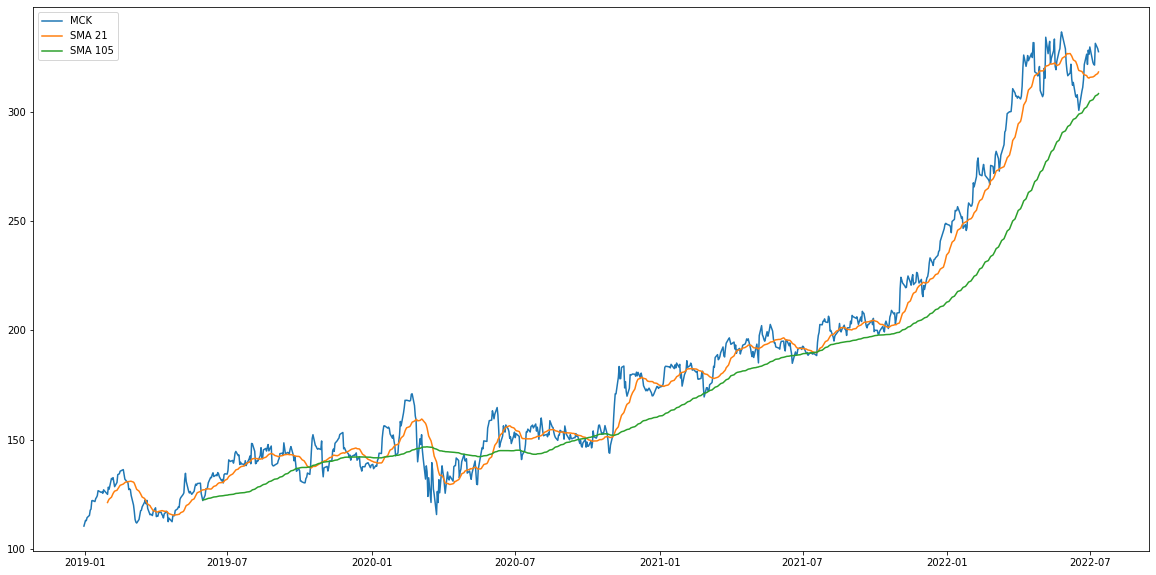

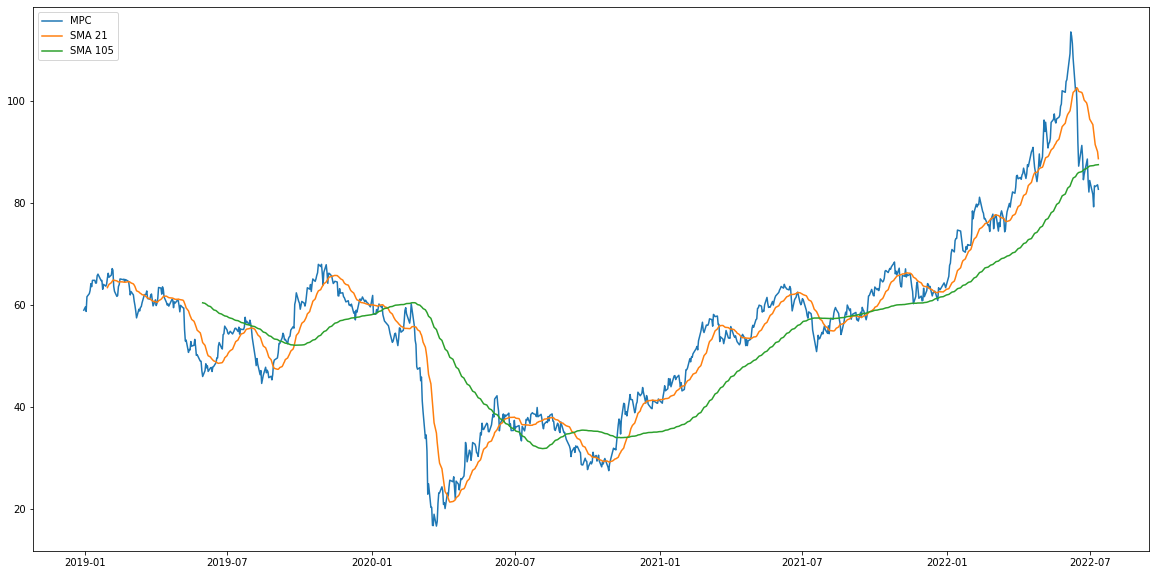

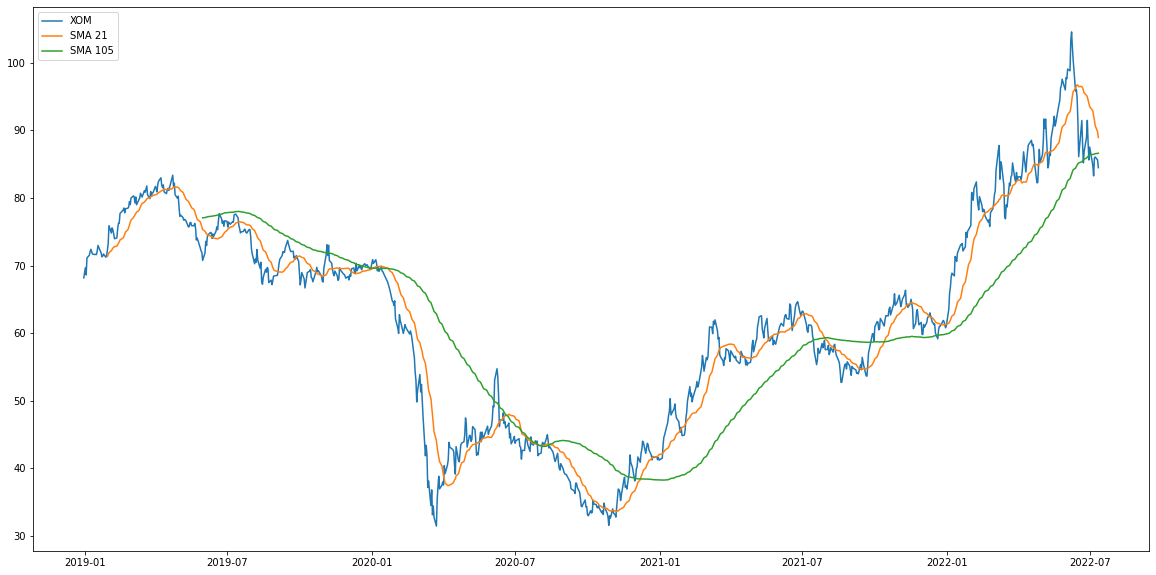

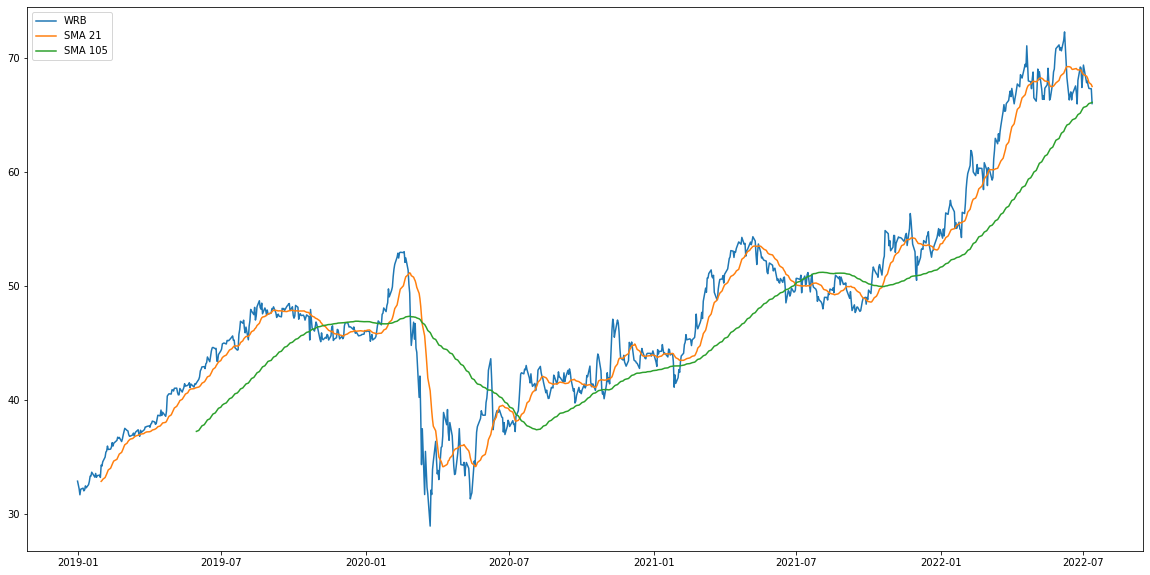

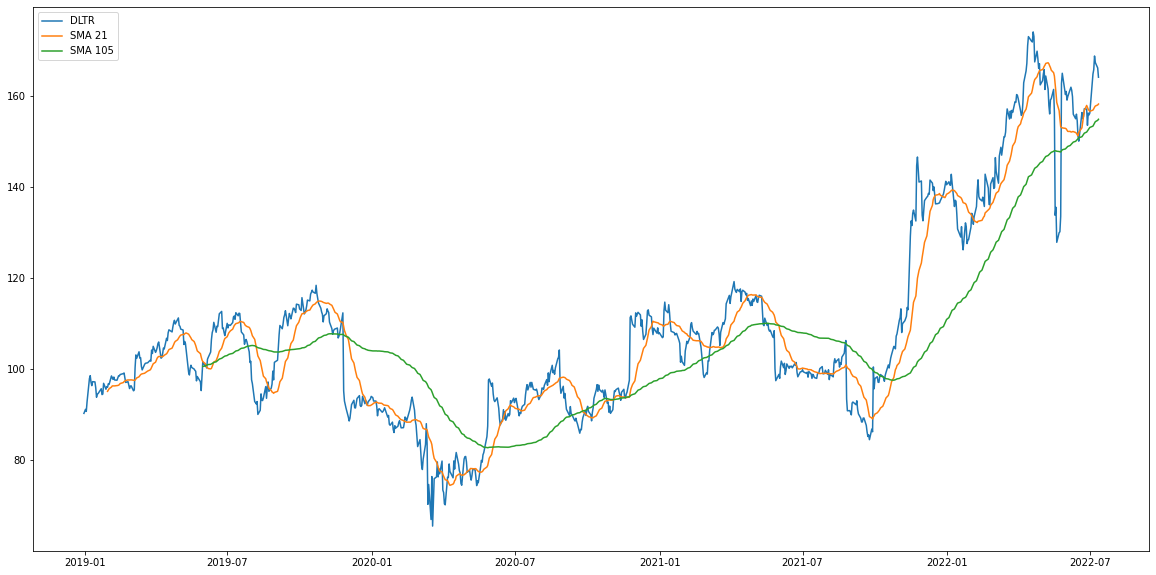

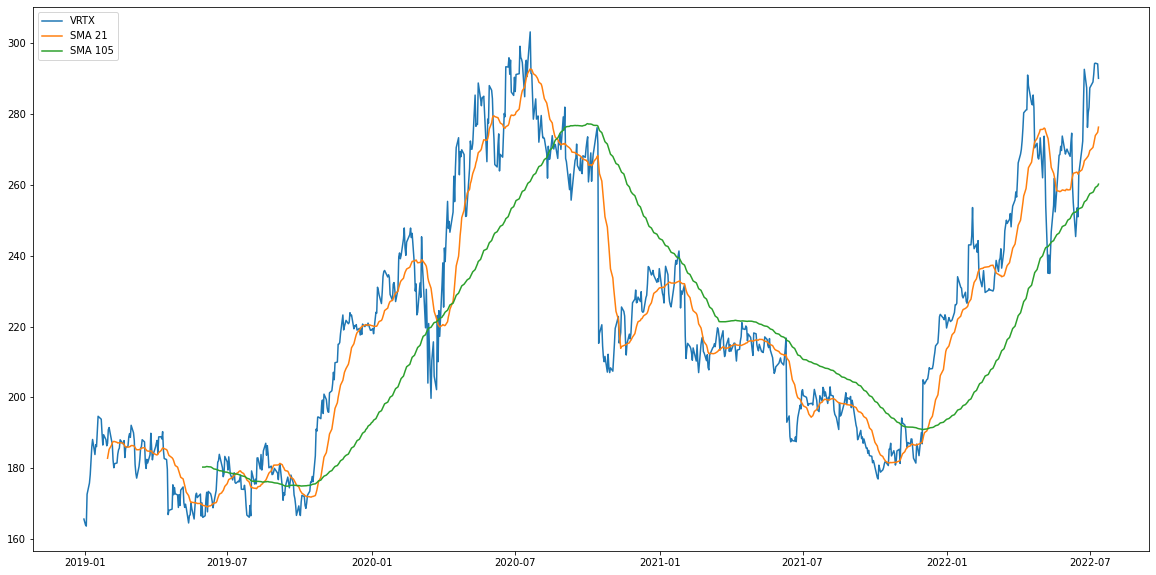

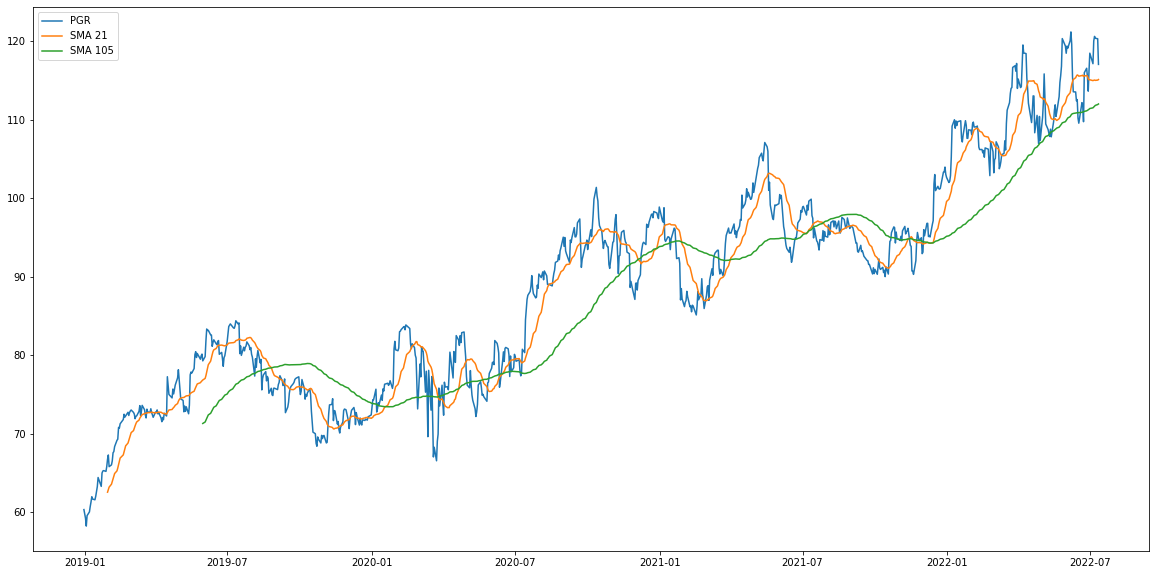

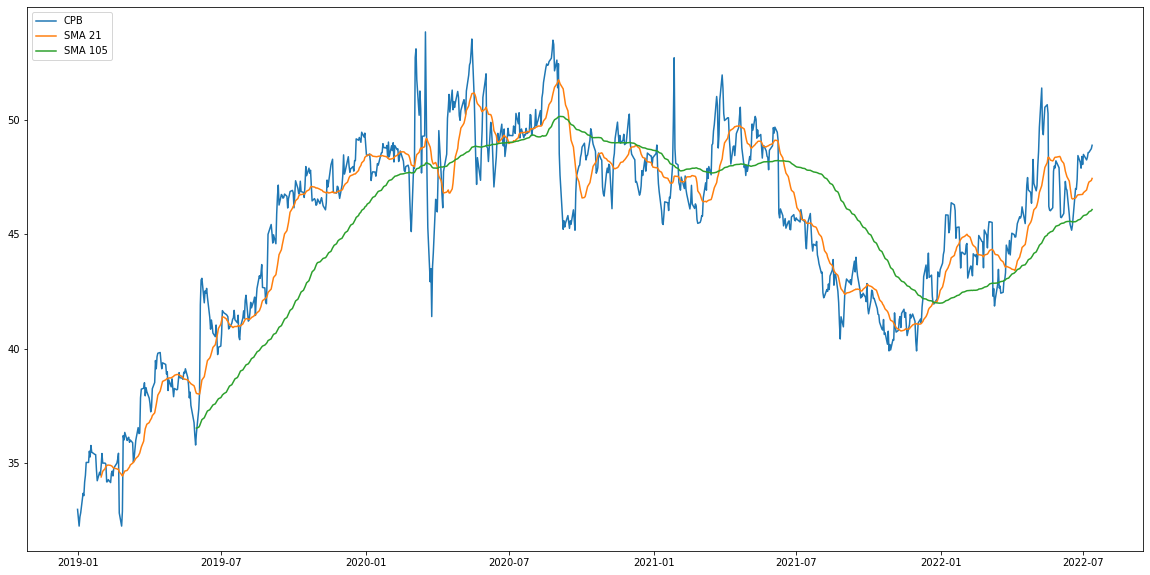

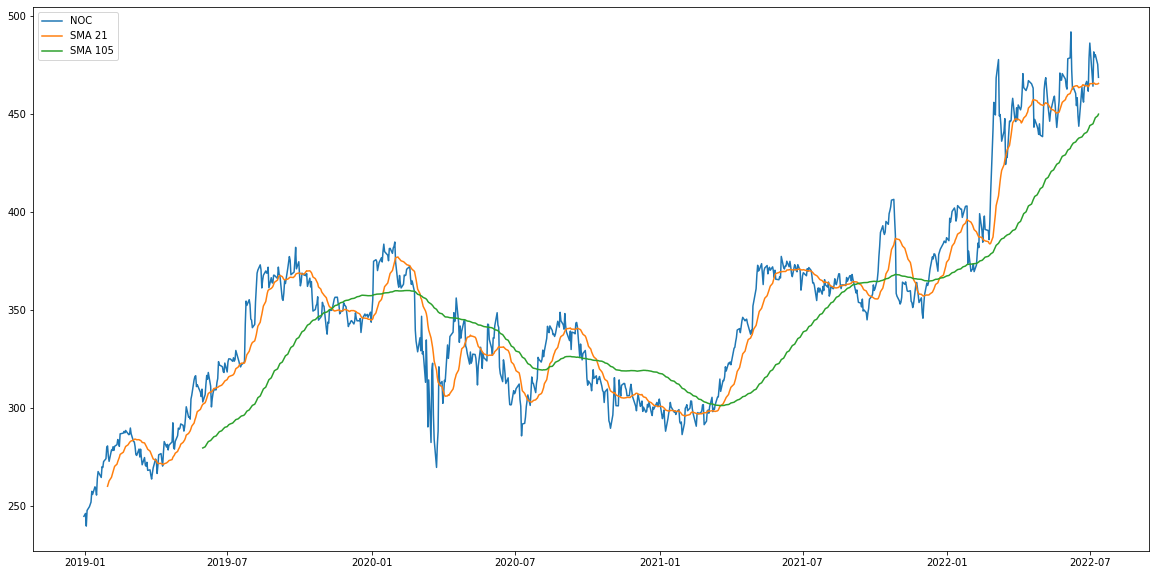

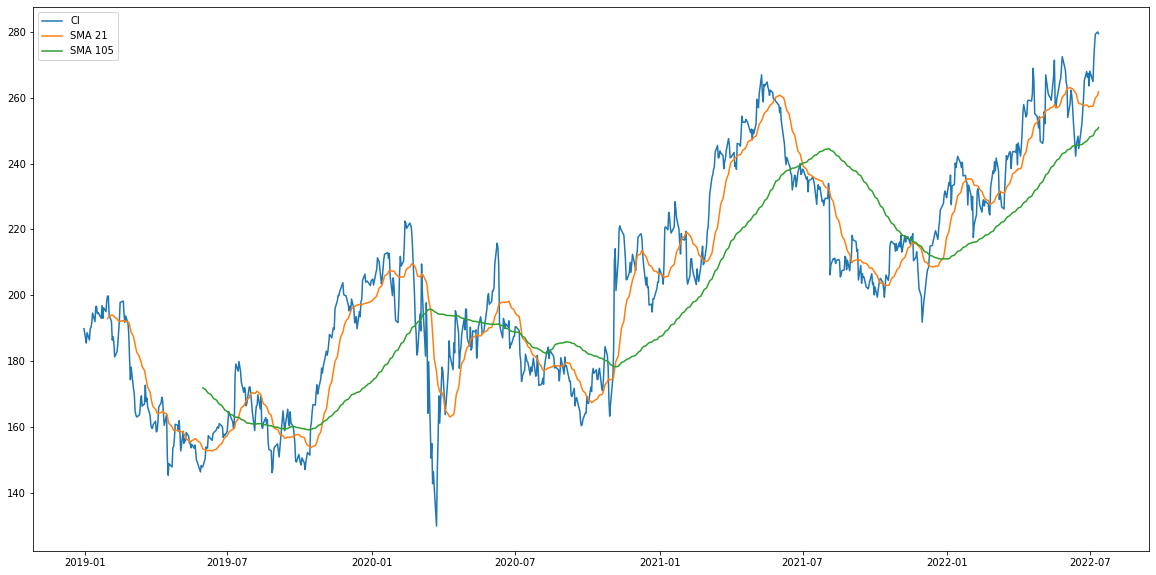

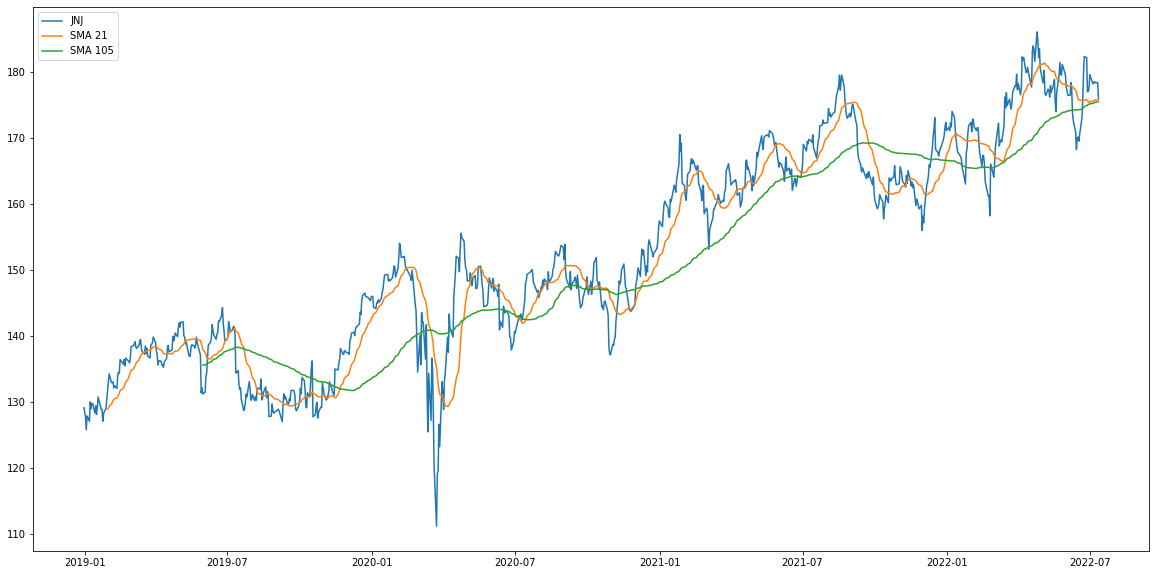

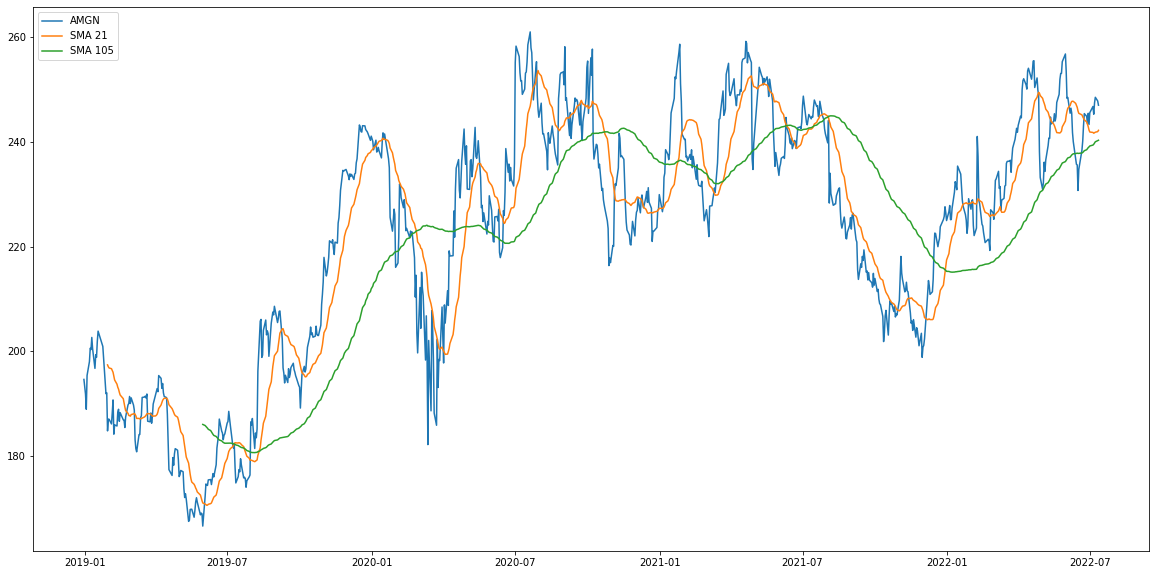

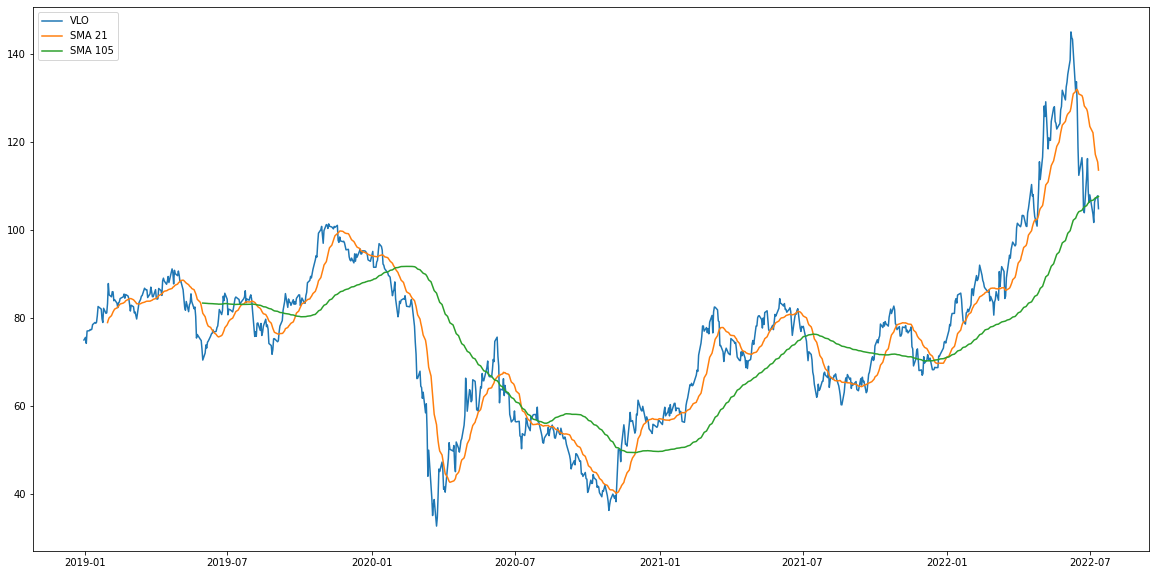

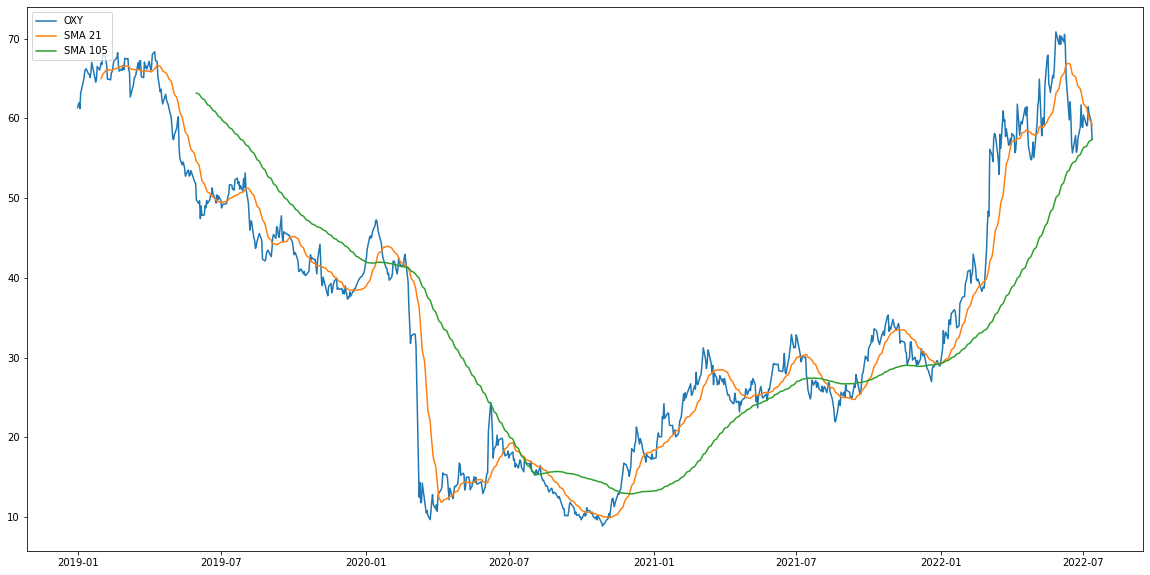

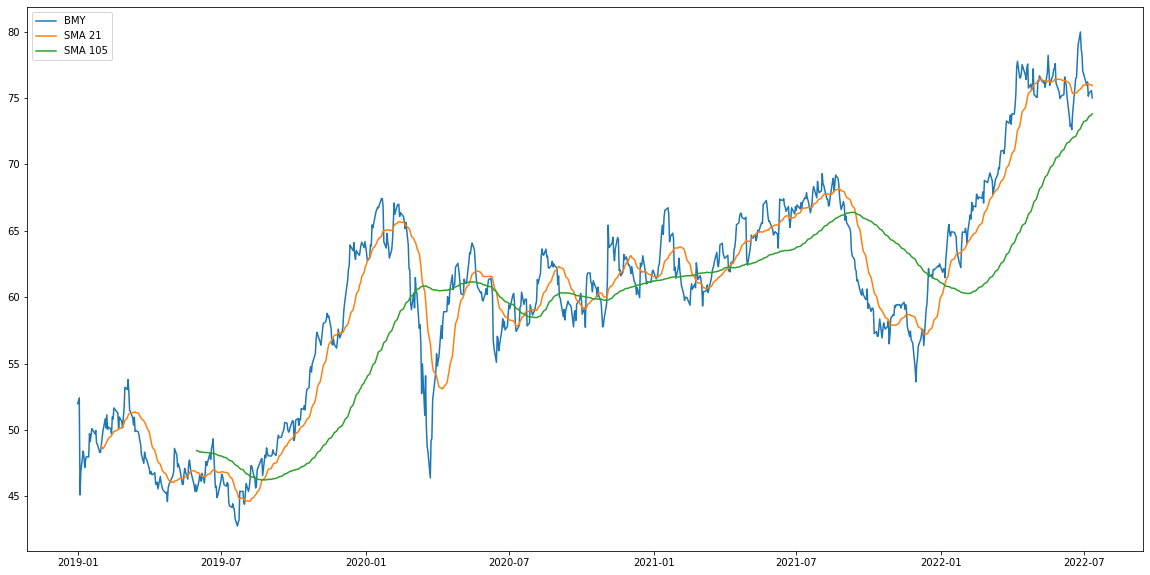

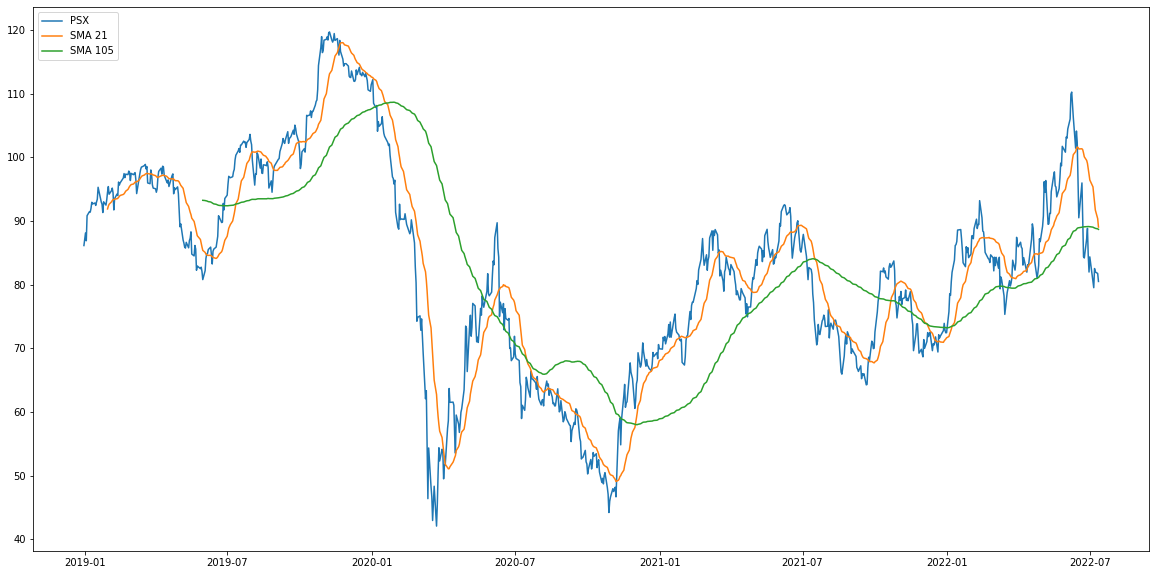

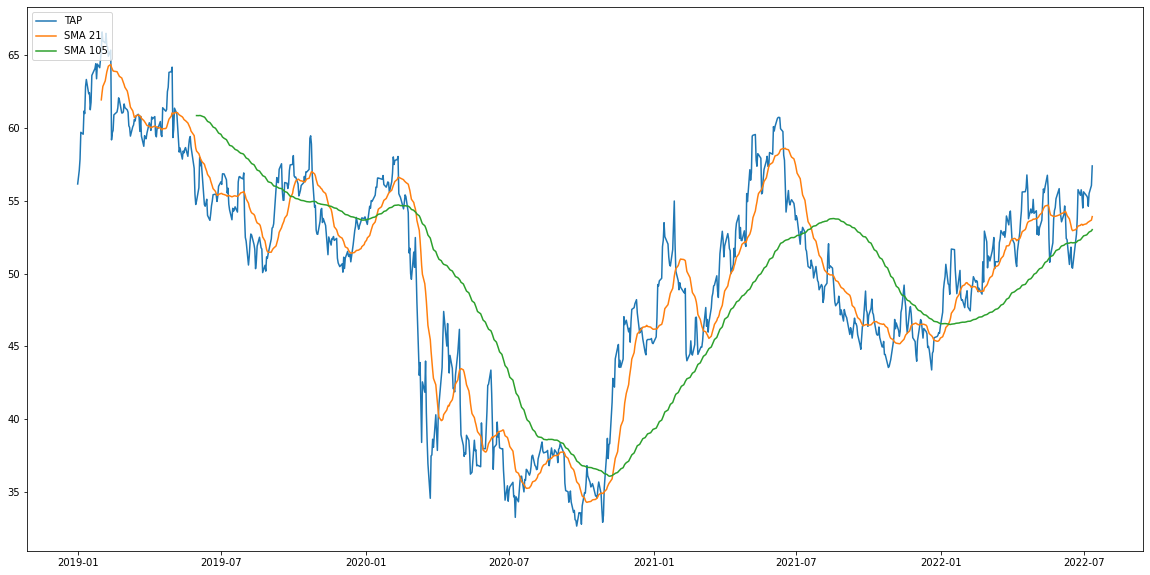

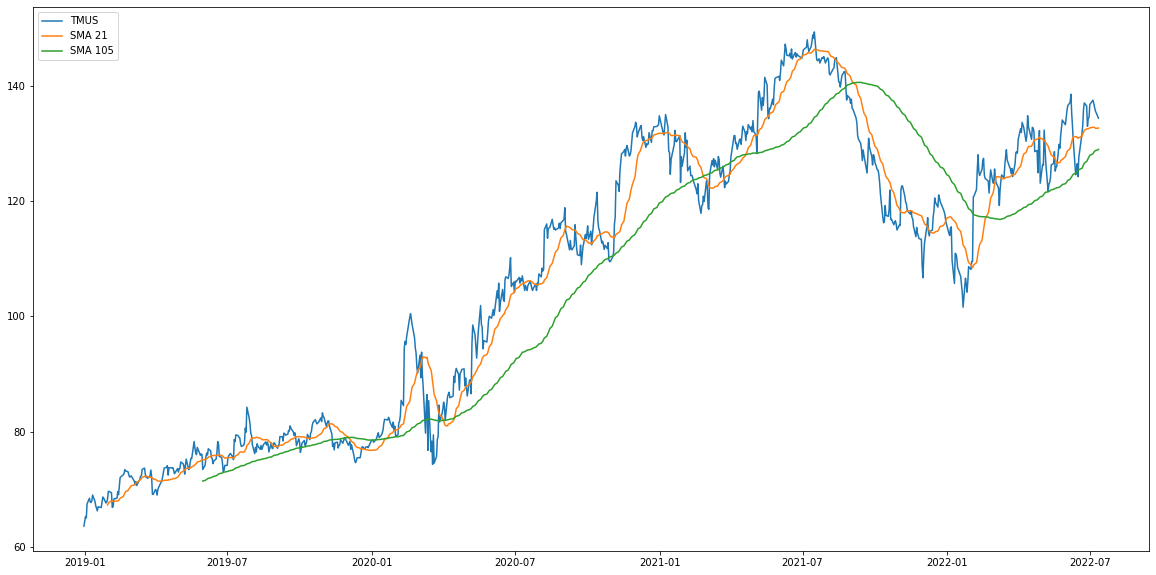

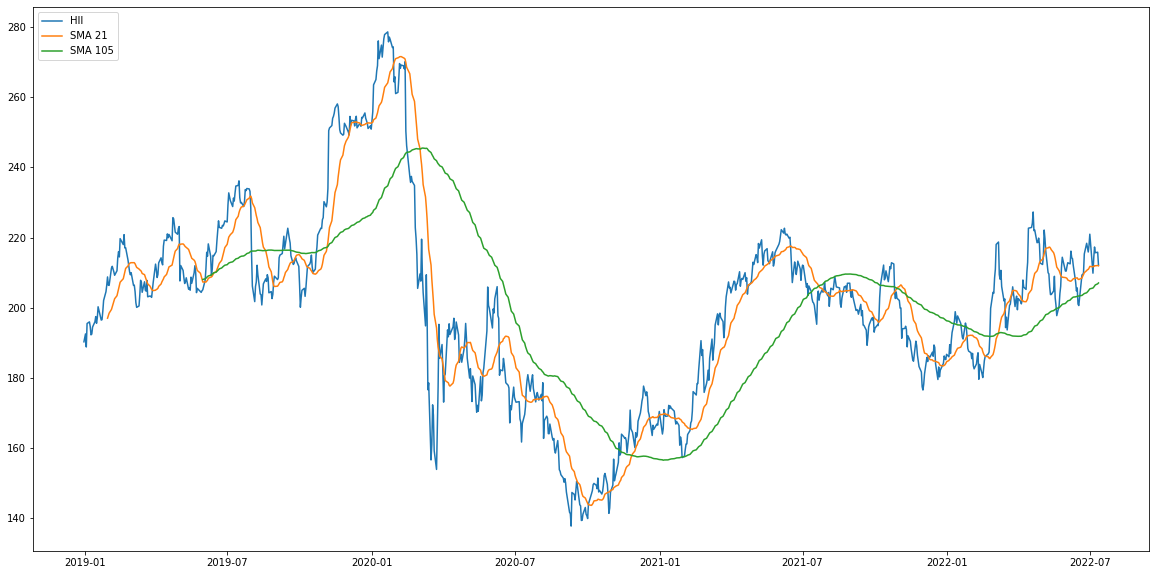

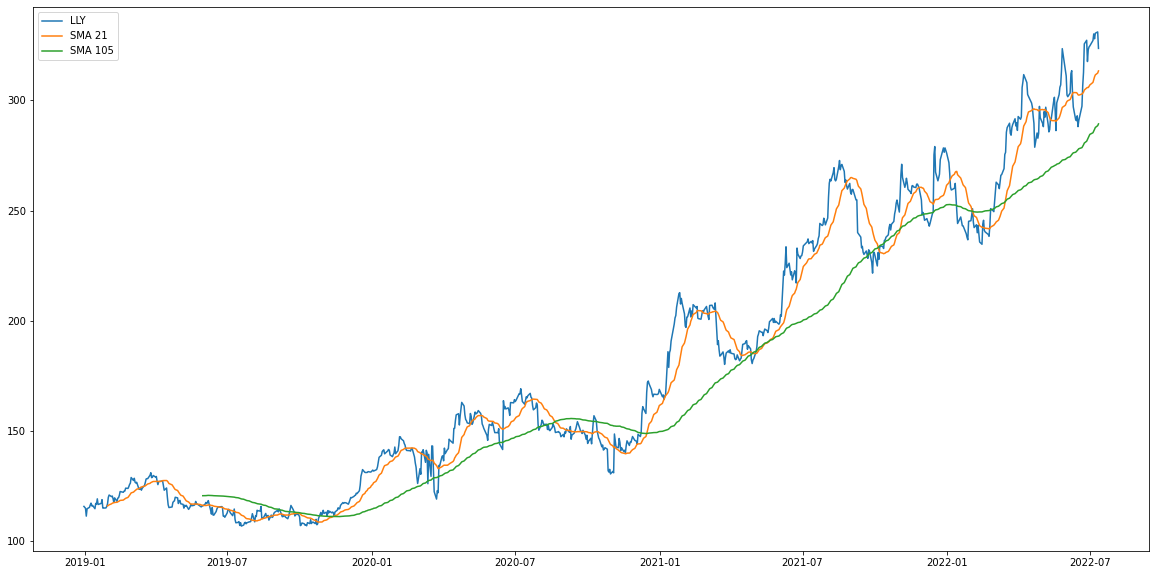

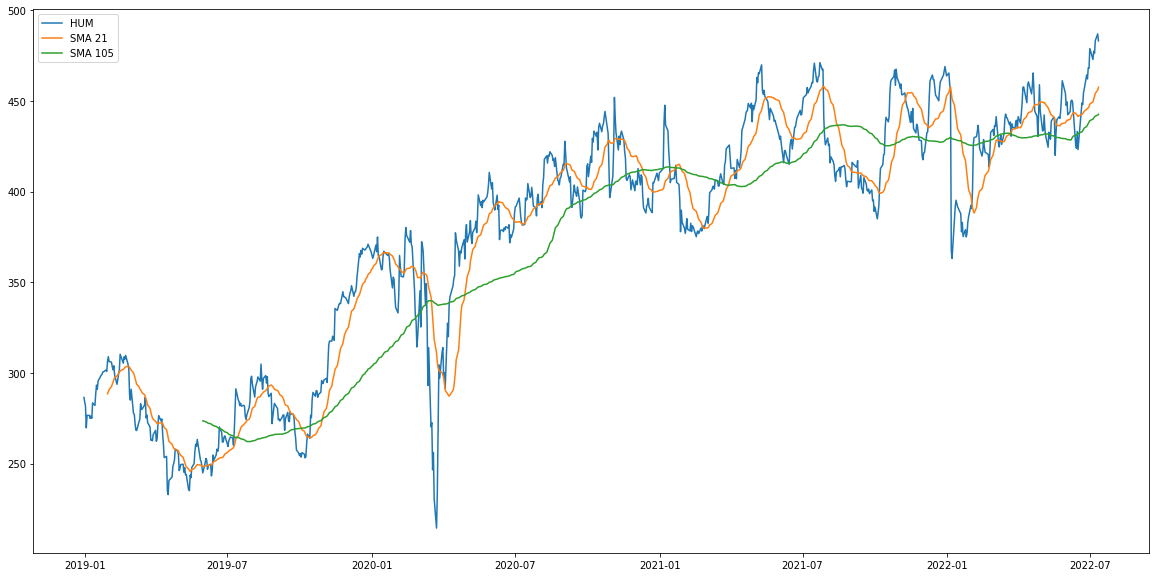

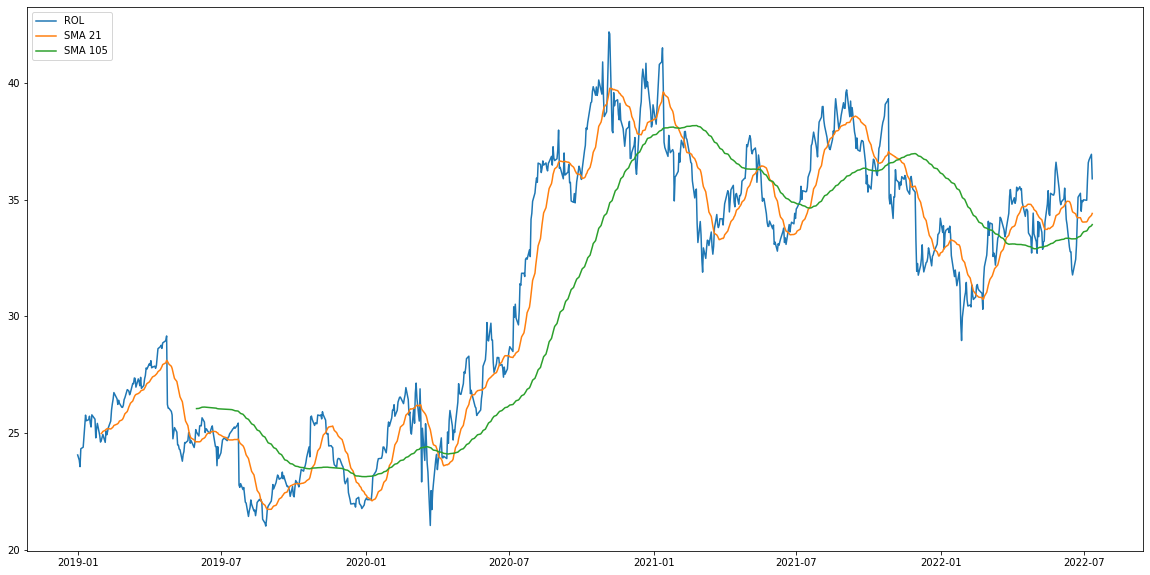

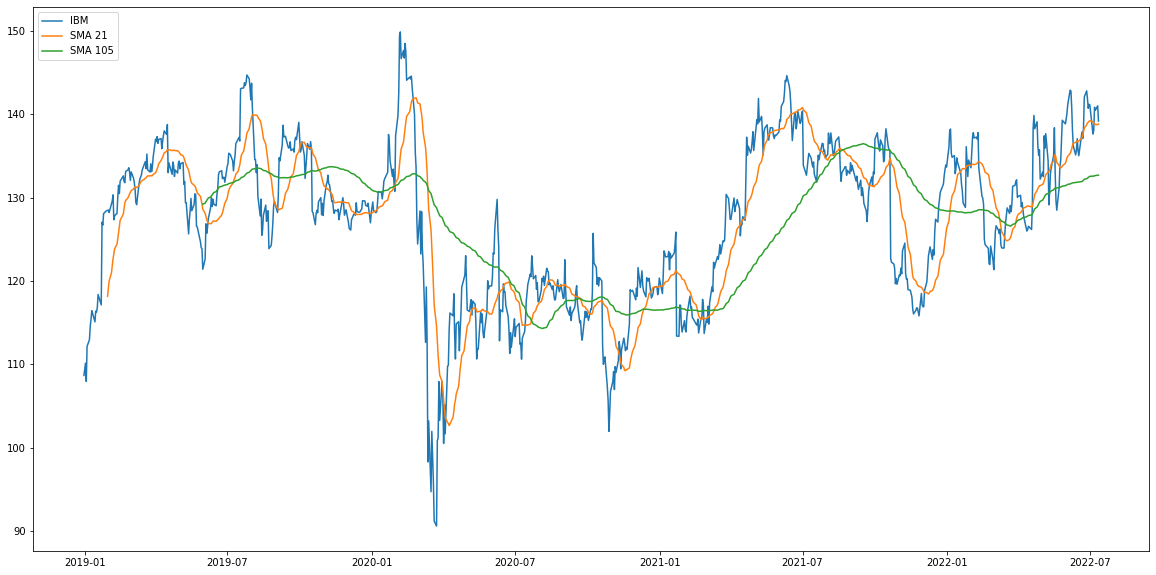

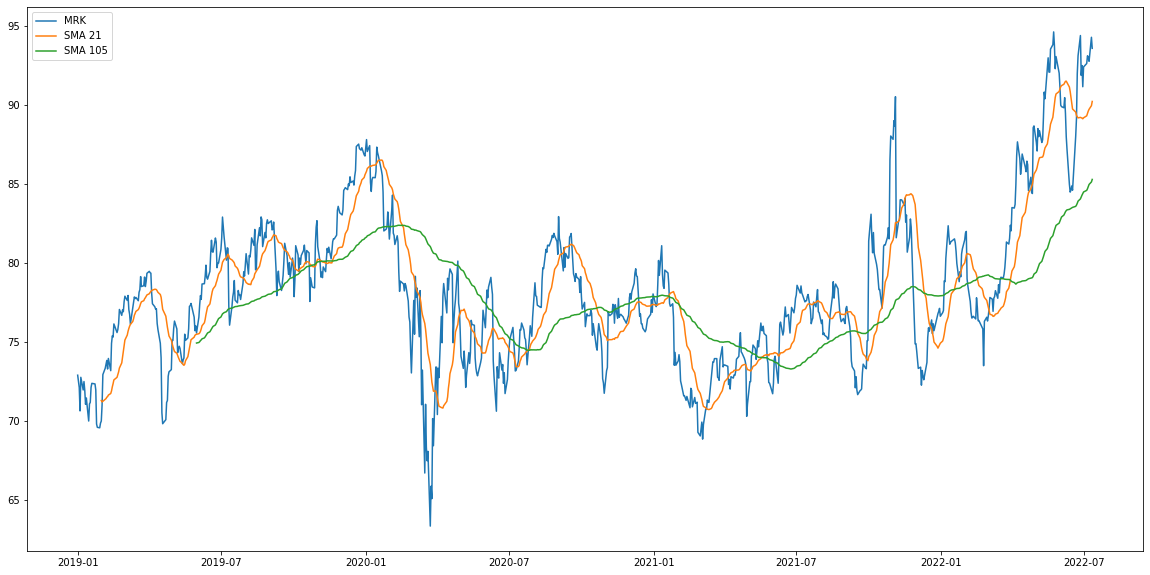

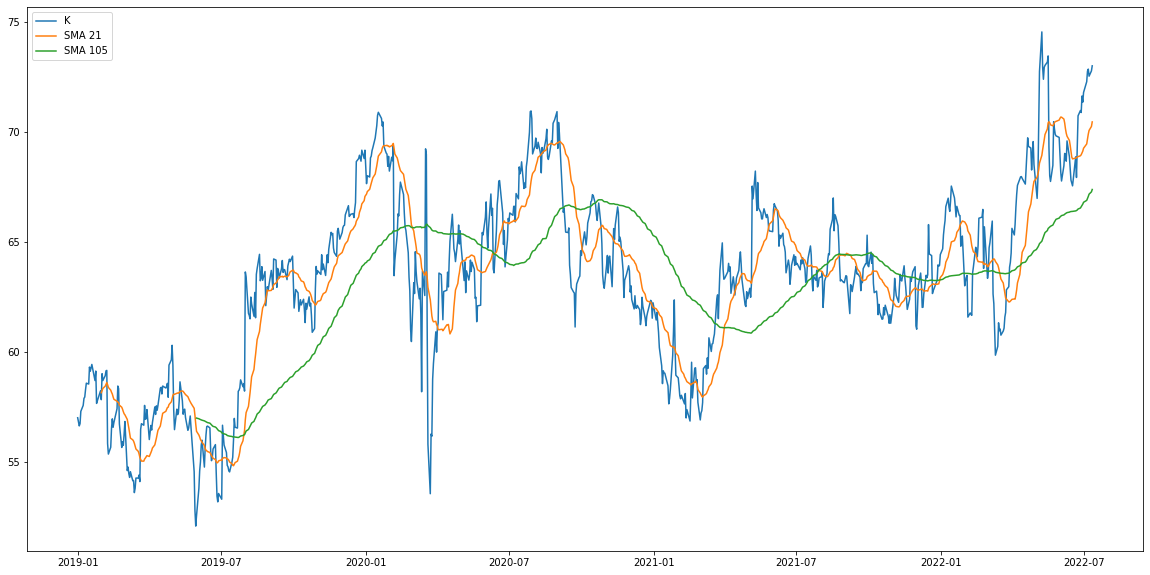

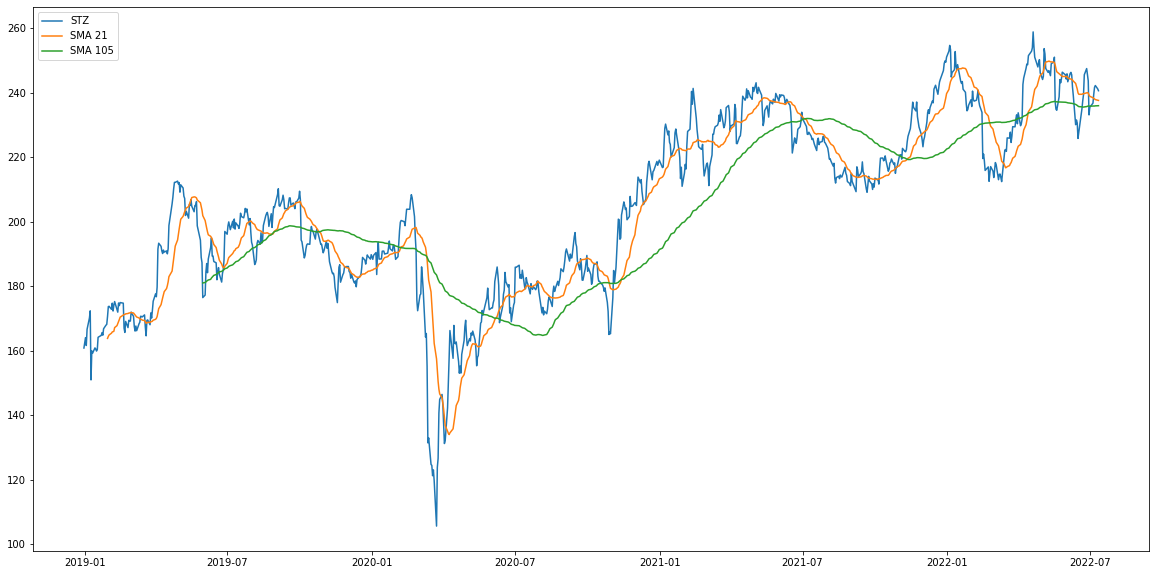

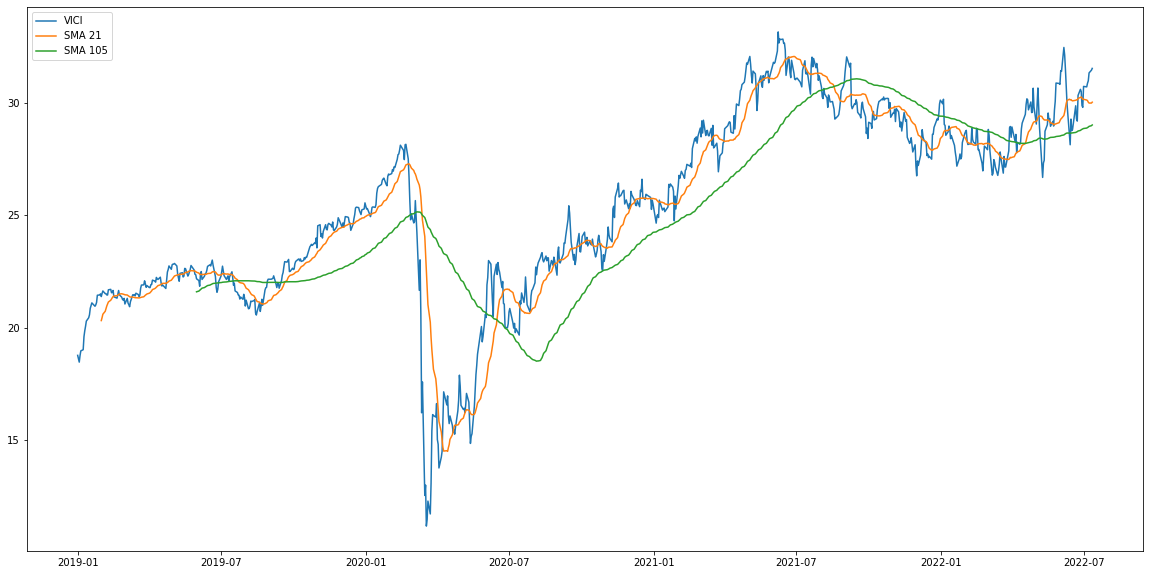

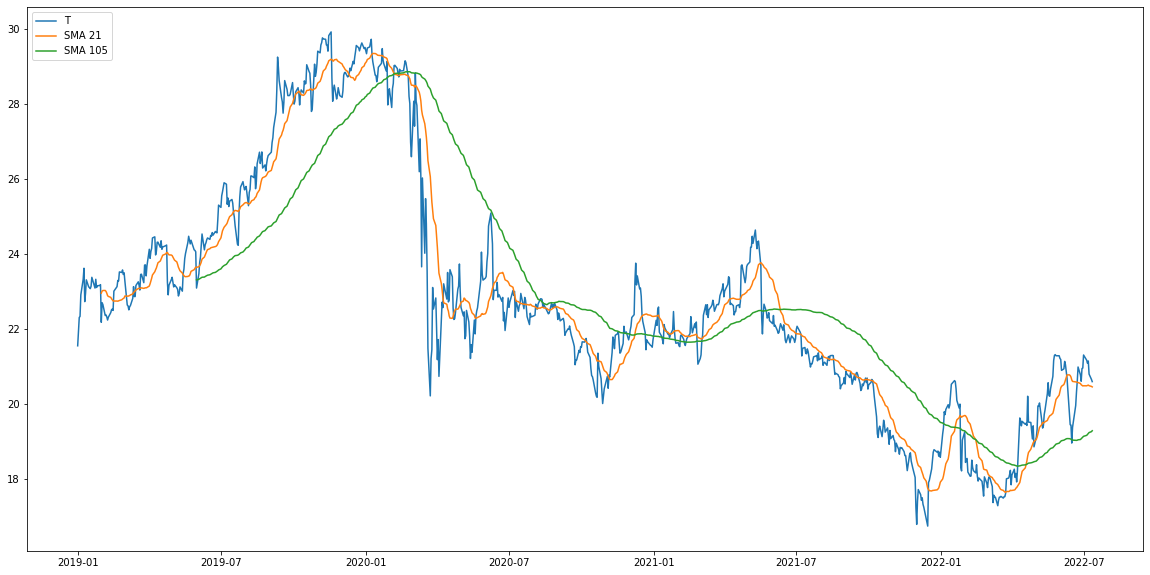

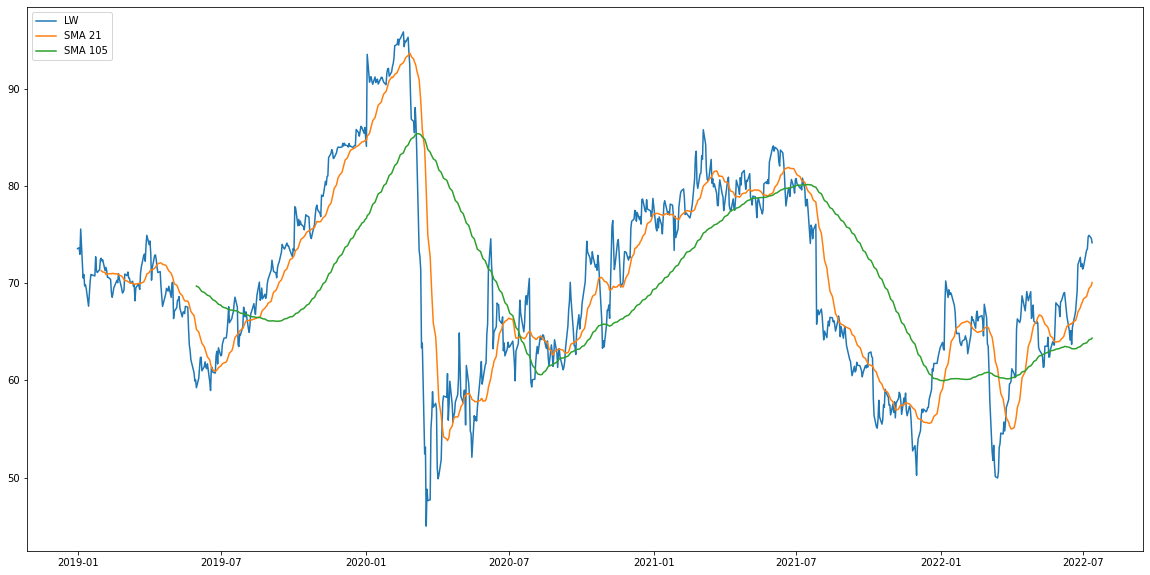

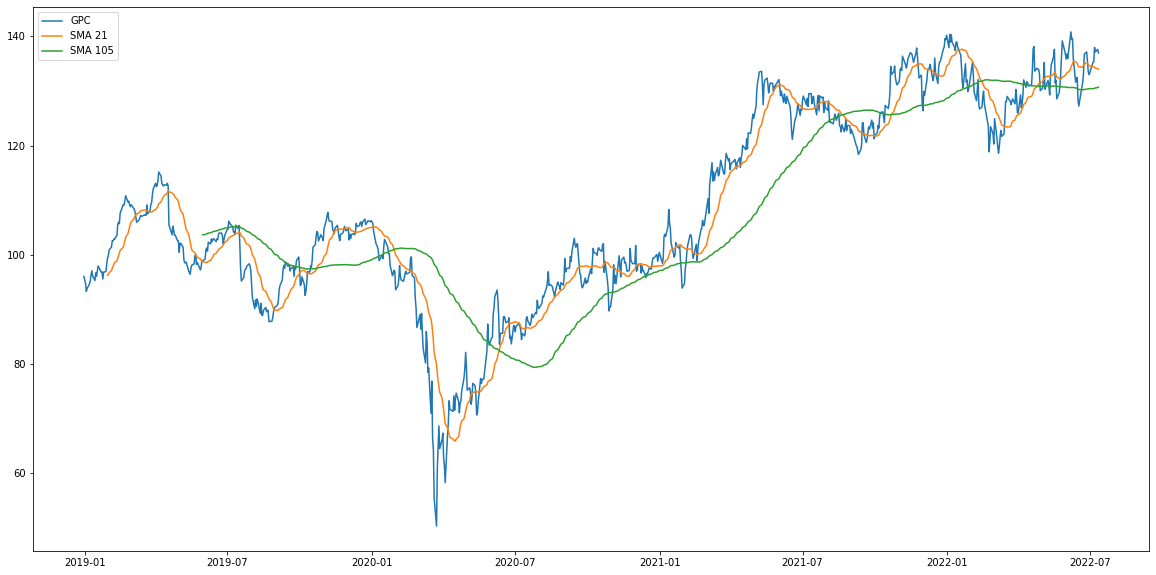

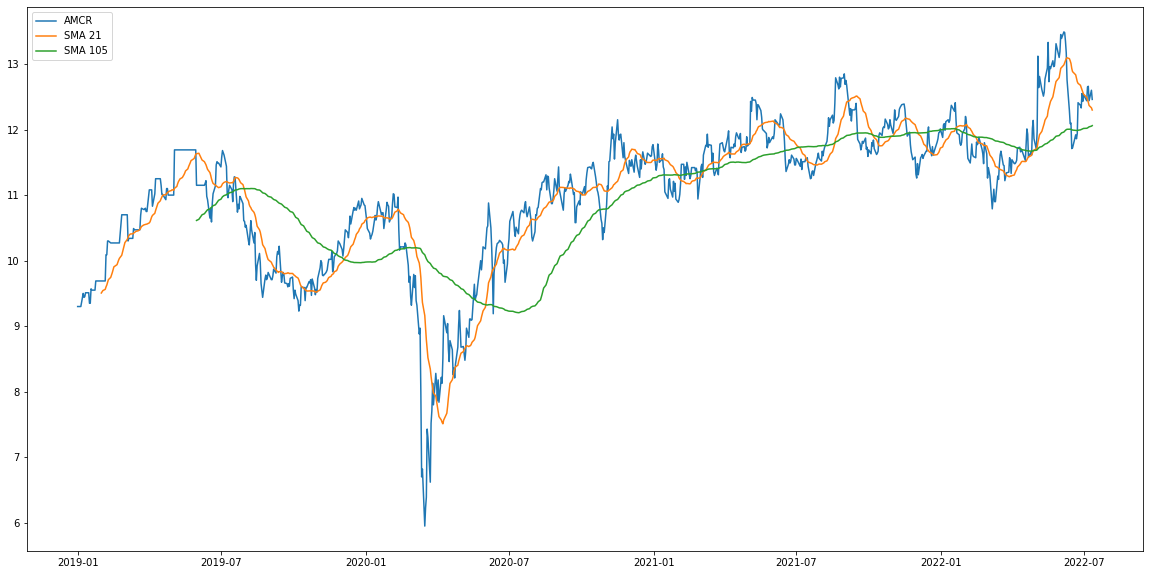

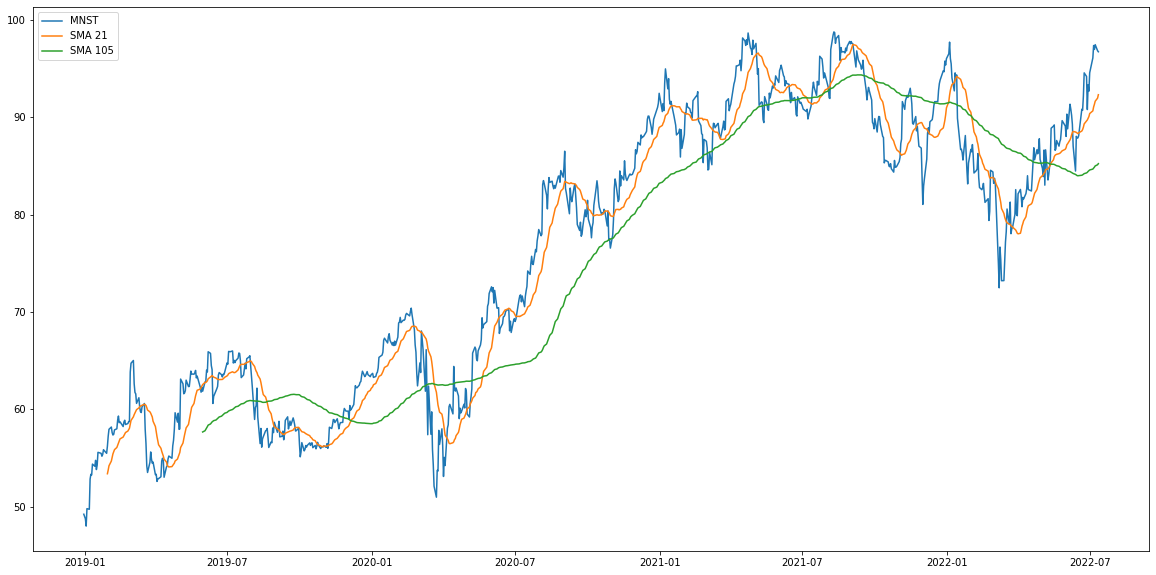

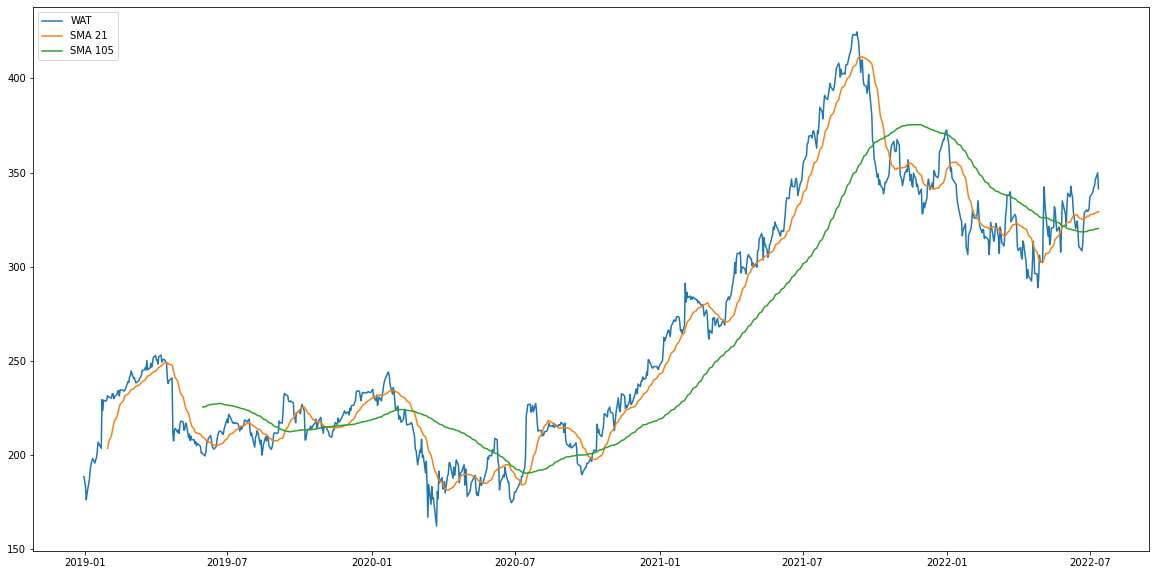

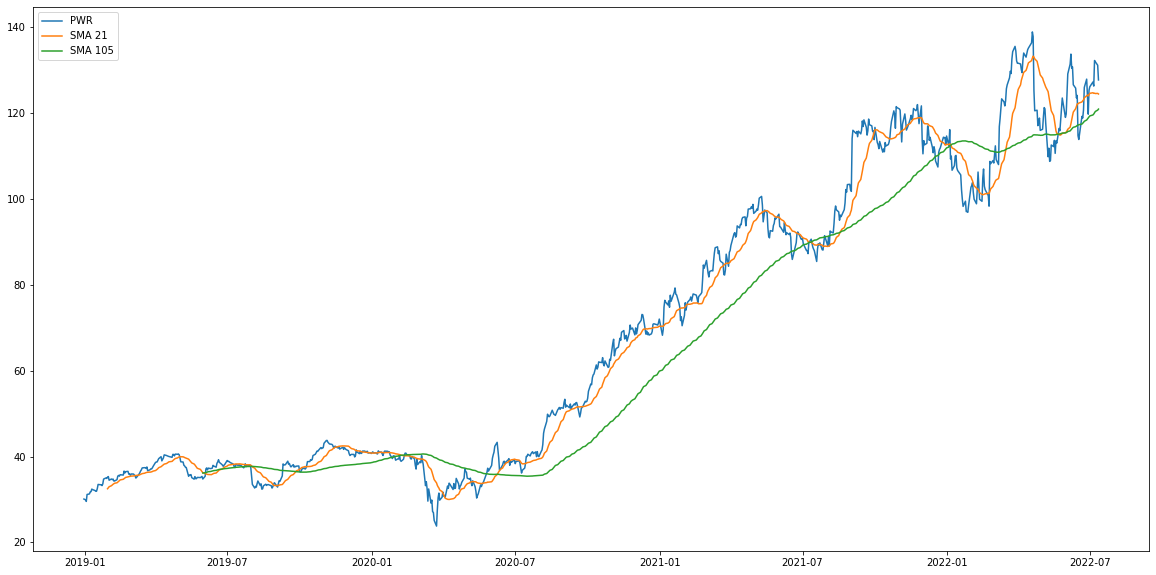

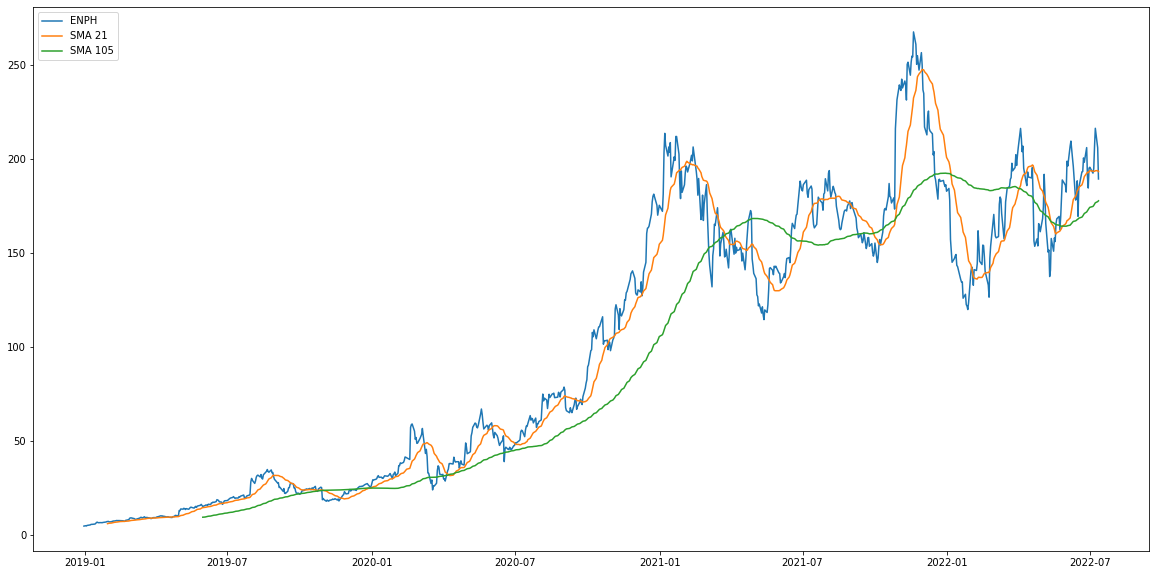

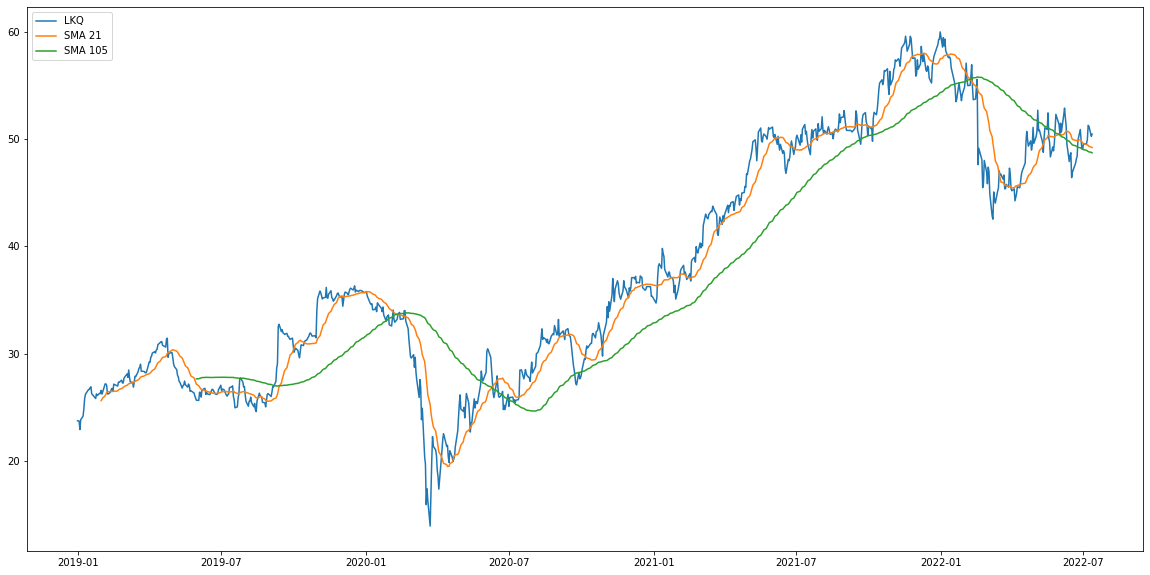

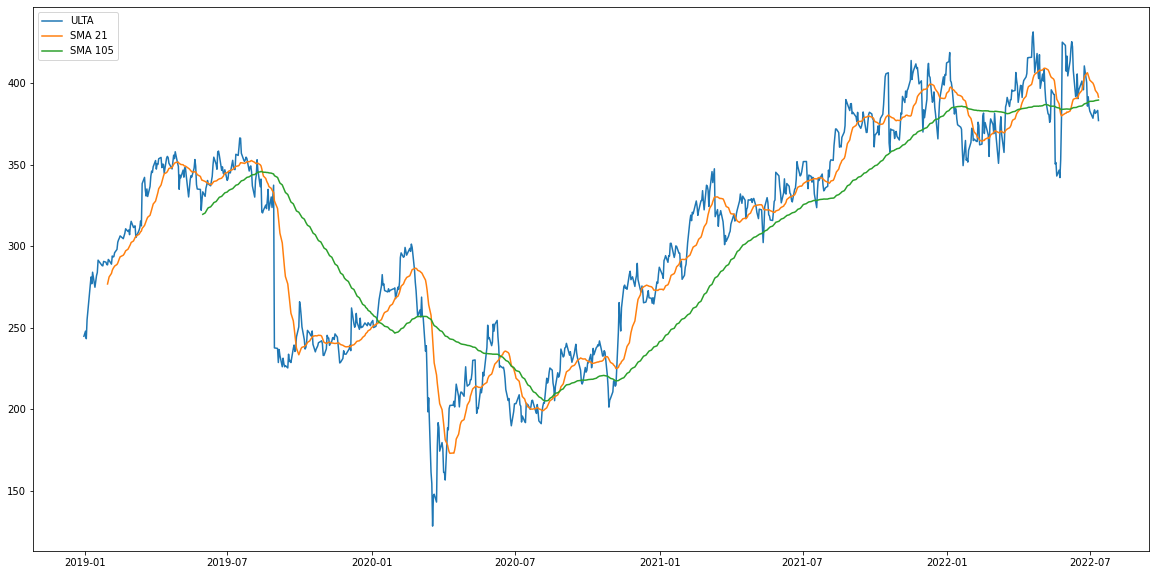

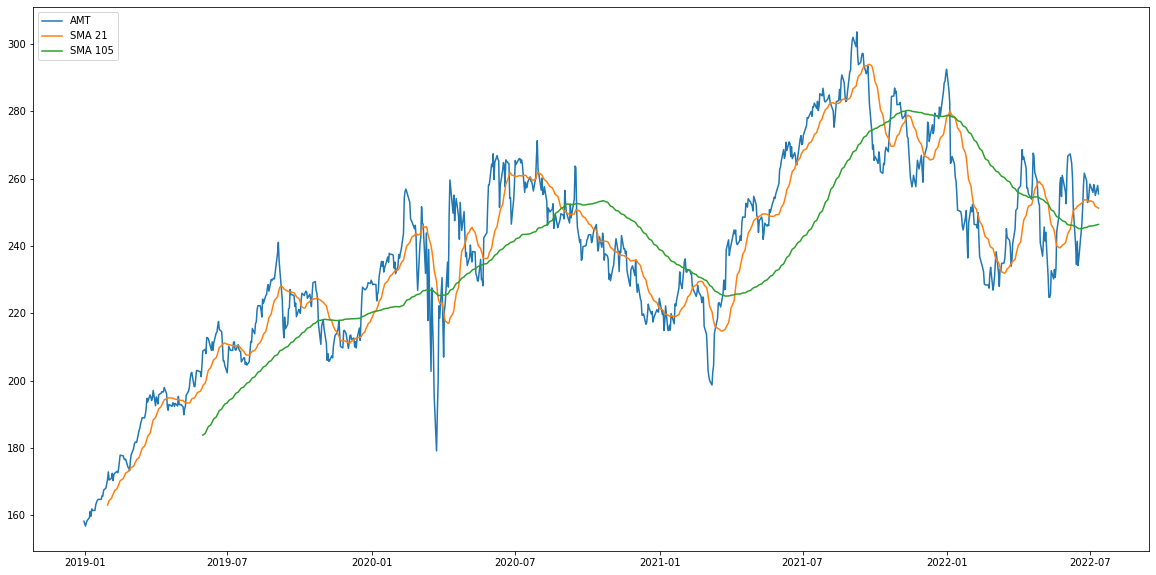

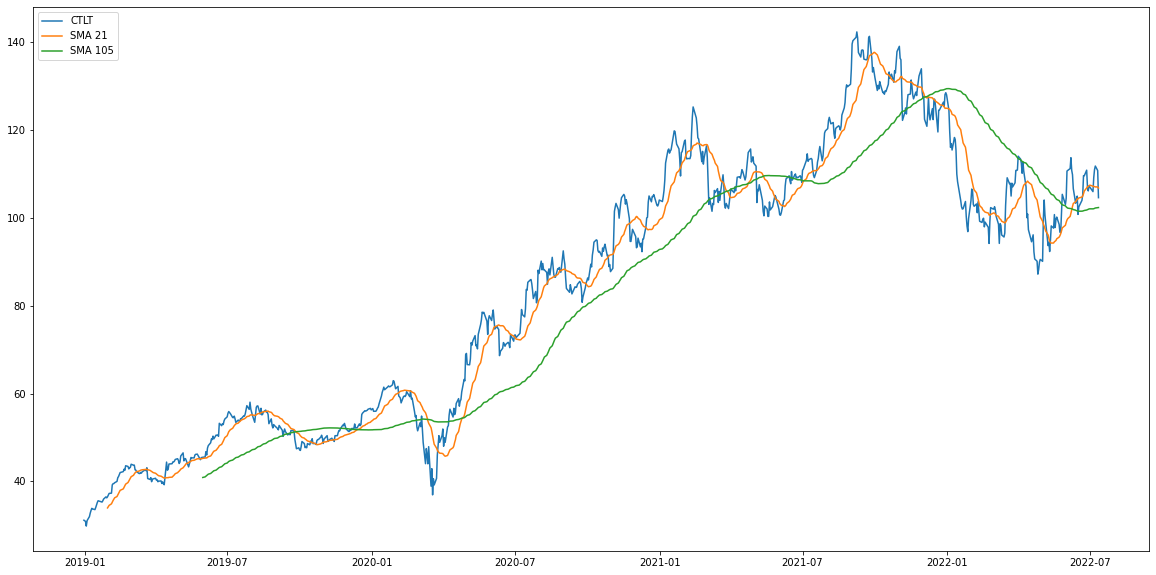

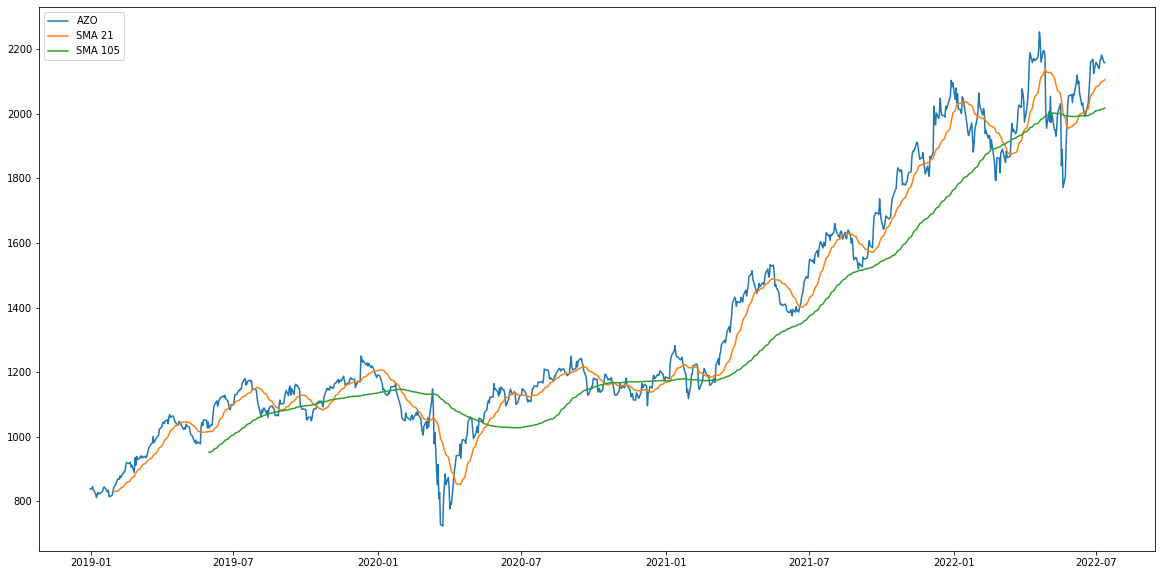

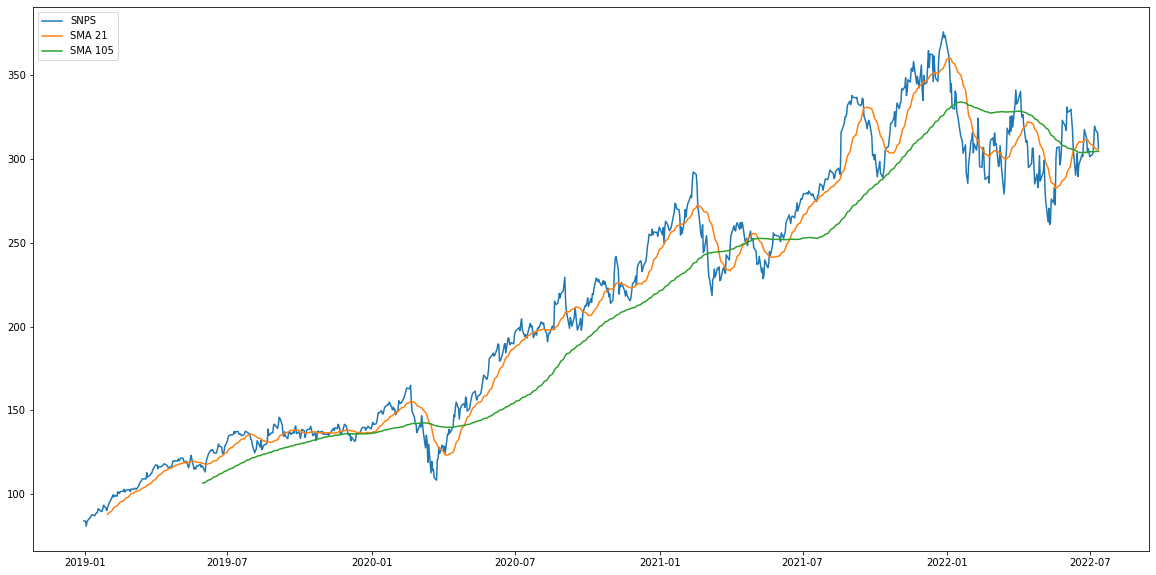

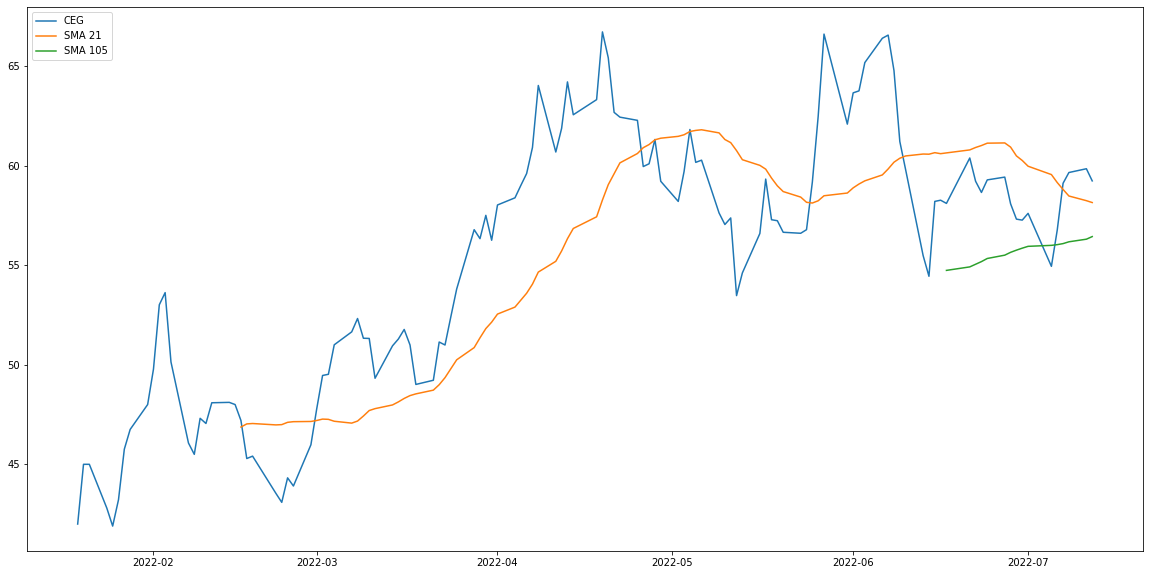

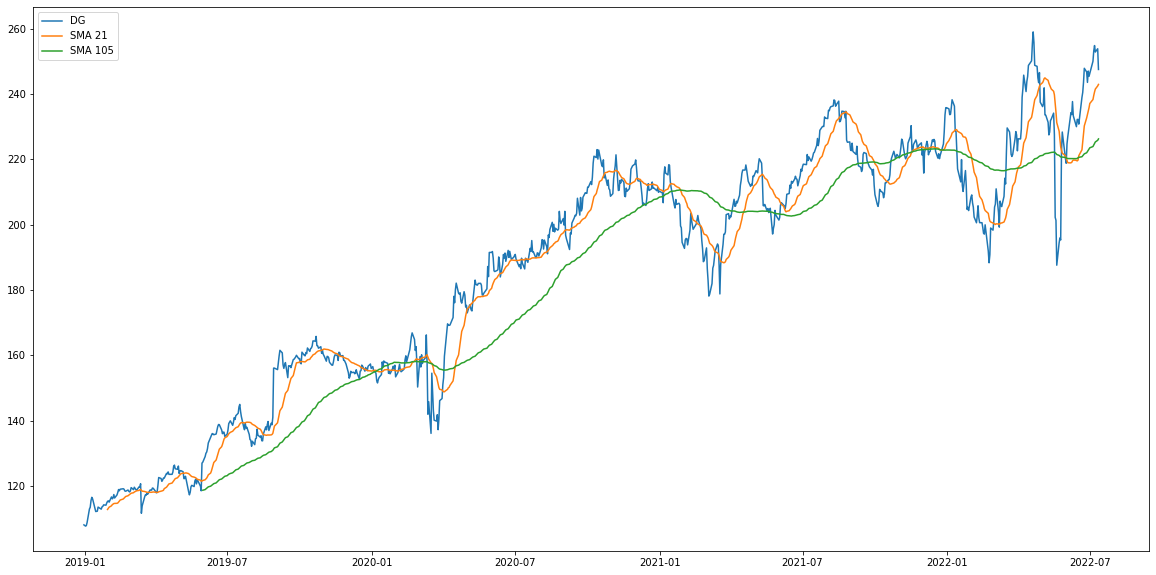

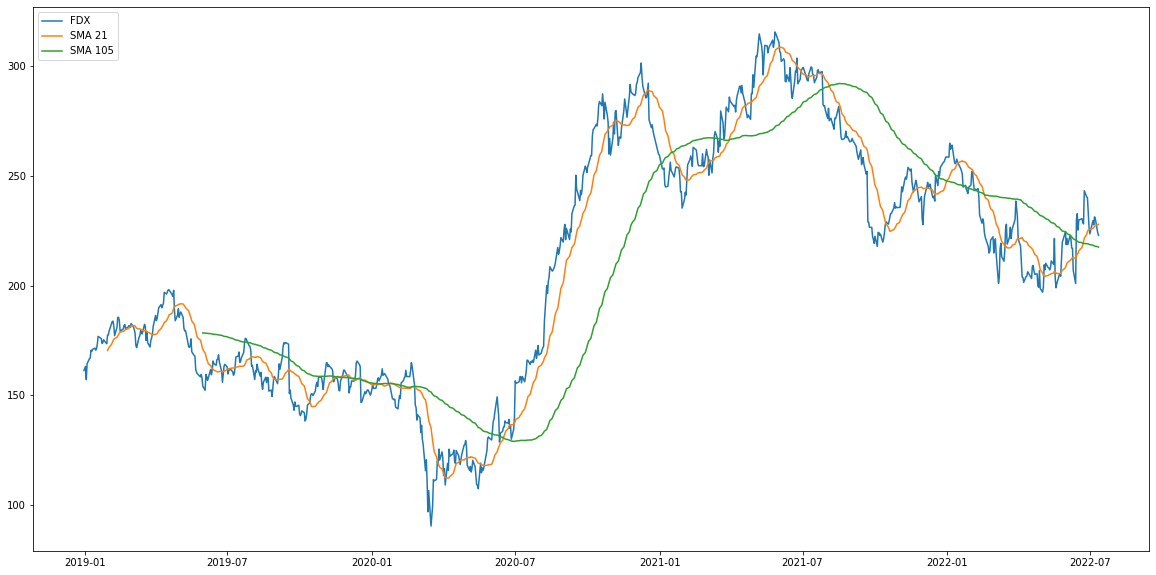

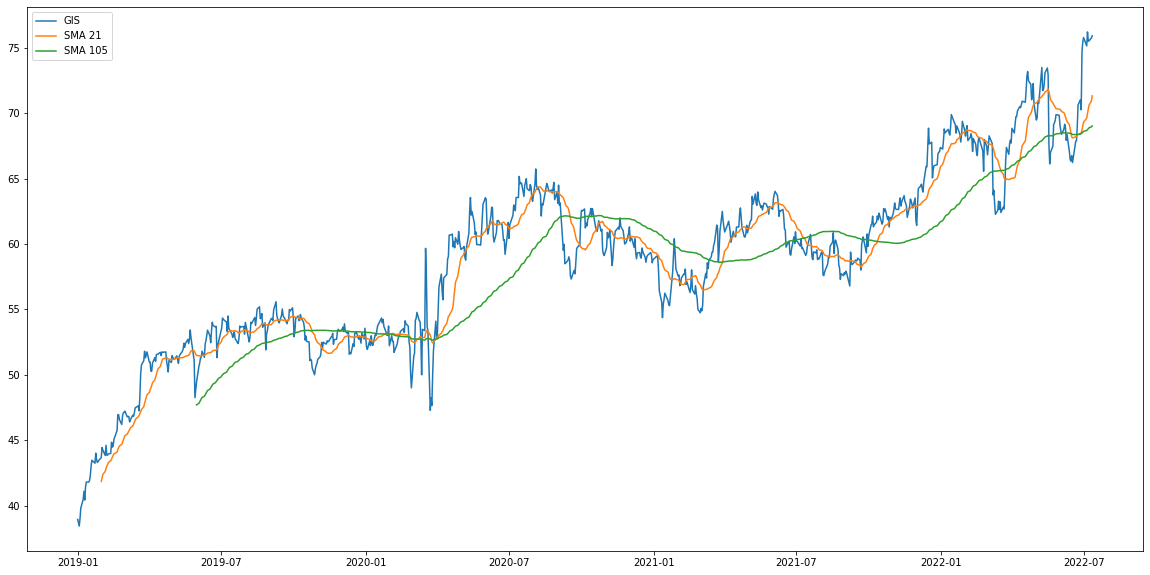

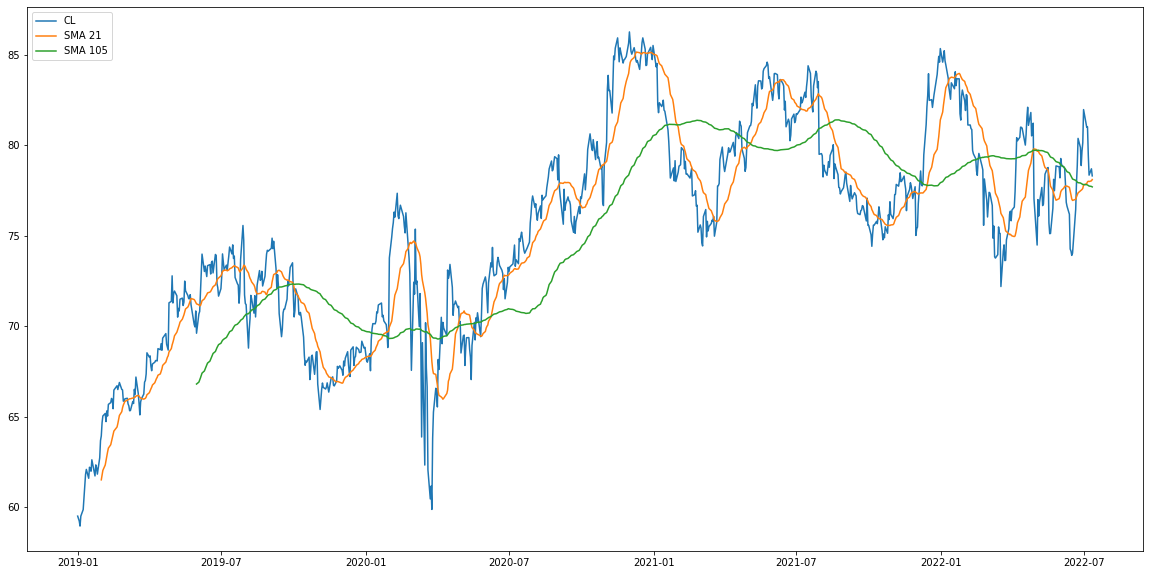

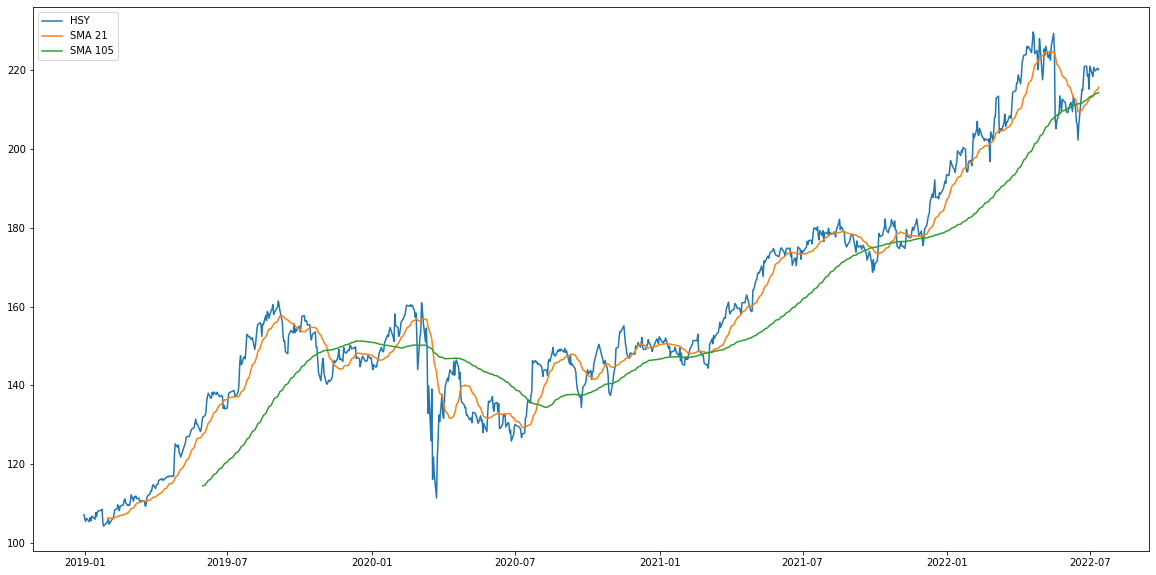

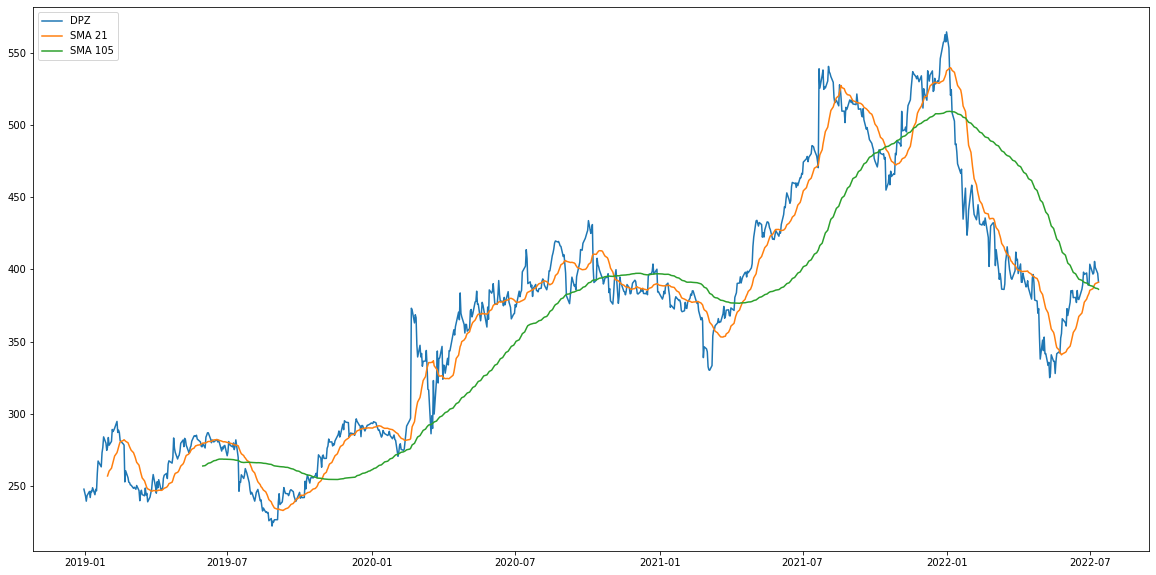

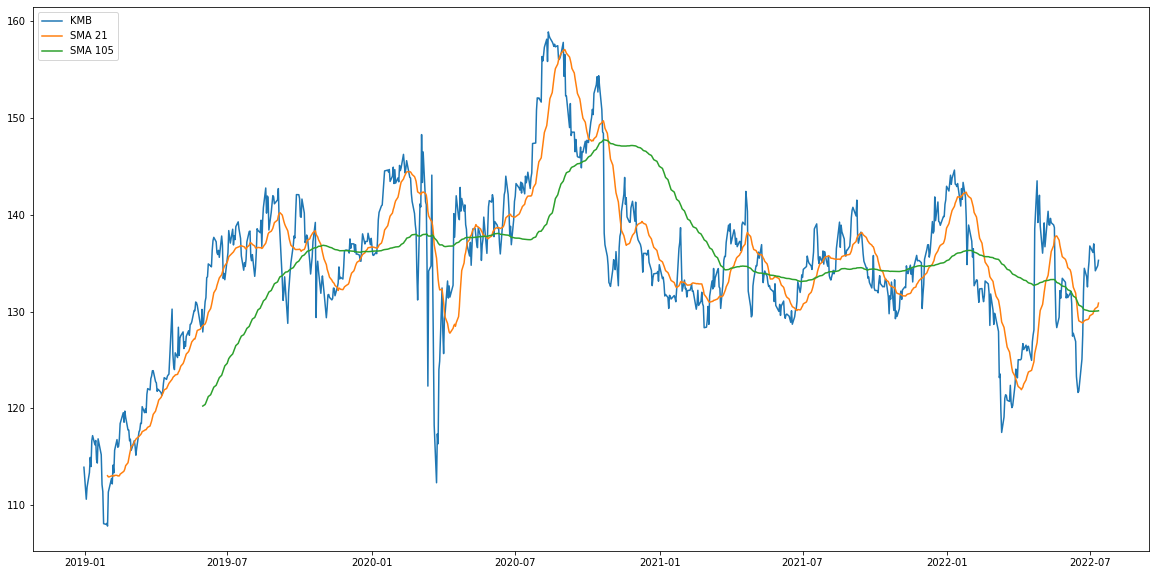

In [24]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = f'SMA {ma_count}');
    plt.plot(ma_week[quote], label = f'SMA {ma_count1}');
    plt.legend(loc=2);